<a href="https://colab.research.google.com/github/BlankDevs/Advanced-Regression-Techniques/blob/main/Explore_Data_Science_Academy_Team_8_JHB_Submission_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Data Science Academy - Team 8 JHB Submission

### Notebook created by Sibusiso Ndimande, Rob Fairon, Vuyiso Moyo, Wisani Baloyi and Ikaelelo Dikhing

# 1. Introduction

This kernel serves as to illustrate the learnings of Team 8 as we venture into the world of machine learning. Our task has been to use regression-based analysis to predict the price of houses in Ames, Iowa (USA) between 2006 and 2010. The data used by this kernel originates from the [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition on the Kaggle platform.

In this kernel, we aim to cover the whole data science process, in a detailed and logical step-by-step manner. We start with the importing of the relevant modules and data. We then move onto performing an Exploratory Data Analysis deep-dive to help us understand the nature and importance of relationships between the price that the eventual selling price of the house (our target variable) and the various characteristics of the house (our predictor variables). 

An intergral part of our project was to enter into this competition and submit our house price predictions to the competition and see how our models predicted the actual price paid for a sample of 1460 houses. The team made multiple submissions to the competiton; the predictions created in this kernel represent our final submission to the competition. Our lowest achieved _Root Mean Squared Logarithmic Error (RMSLE)_, the official scoring metric used for this competition, was 0.1191.

# 2 . Importing modules and data

We start by bulk importing the relevant packages that will be necessary to perform our analysis and build our models.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew 
from scipy.special import boxcox1p
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
%matplotlib inline
color = sns.color_palette()
sns.set(style='darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
warnings.filterwarnings('ignore')
print ('All relevant packages imported successfully')

All relevant packages imported successfully


Next, we import both the train and test datasets the Kaggle repository.

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#df_train = pd.read_csv("../input/train.csv")
#df_test = pd.read_csv("../input/test.csv")
print('Data imported')


print('Checking shape of datasets')
print("The are {} rows of data in train dataset and {} columns in training dataset". format(str(df_train.shape[0]), str(df_train.shape[1])))
print("The are {} rows of data in train dataset and {} columns in training dataset". format(str(df_test.shape[0]), str(df_test.shape[1])))

# Lets create ID variables for safe-keeping
train_ID = df_train.iloc[:,0]
test_ID = df_test.iloc[:,0]

Data imported
Checking shape of datasets
The are 1460 rows of data in train dataset and 81 columns in training dataset
The are 1459 rows of data in train dataset and 80 columns in training dataset


We can see that the datasets are almost identical, bar the presence of <font color='grey'>__SalePrice__</font> in the train dataset. There are 80 potential predicitor variables. Let's have a brief look at the train dataset. 

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We need to make sure that there are no duplicates in the train dataset.

In [ ]:
unique_ID = len(set(df_train.Id))
total_ID = df_train.shape[0]
duplicate_ID = total_ID - unique_ID
print("There are " + str(duplicate_ID) + " duplicate IDs for " + str(total_ID) + " total rows")

There are 0 duplicate IDs for 1460 total rows


All set for some further investigation

# 3 . Exploratory Data Analysis Deep Dive

This section looks to identify relevant patterns in the relationships between the target and predictor variables. We won't make use of any complex statistical analysis to identify these relationships but rather visualise the data to see what catches the eye. This process will provide us with a more comprehensive understanding of our data. 

## 3.1 The distribution of SalePrice

Let's look at how our target variable is distributed

In [ ]:
df_train['SalePrice'].describe().to_frame()

,SalePrice
count,1460.000
mean,180921.196
std,79442.503
min,34900.000
25%,129975.000
50%,163000.000
75%,214000.000
max,755000.000


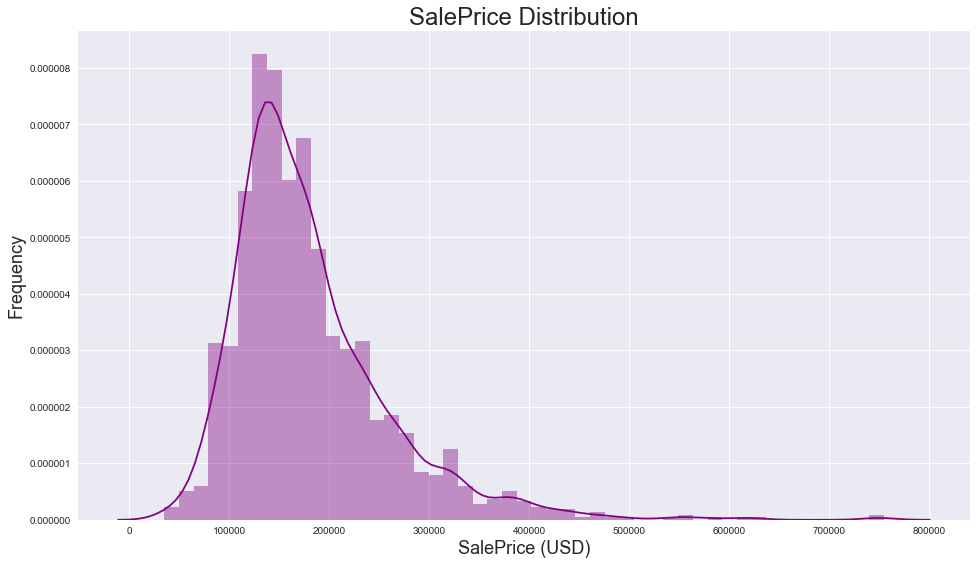

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('SalePrice Distribution', fontsize=24)
sns.distplot(df_train['SalePrice'], color='purple')
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('SalePrice (USD)', fontsize=18)
plt.savefig('figures/sale_price_distribution_skewed.png')

In [ ]:
print("Skewness of SalePrice: %f" % df_train['SalePrice'].skew())
print("Kurtosis of SalePrice: %f" % df_train['SalePrice'].kurt())

Skewness of SalePrice: 1.882876
Kurtosis of SalePrice: 6.536282


From the above, we notice that the <font color='grey'>__SalePrice__</font> is a heavily positively-skewed distribution; the long tail on the right-side of the distribution gives this away. This imples that majority of the house prices fall within the 100 000 to 300 000 (USD) cost range. However, there are a few houses that have sold for more than 700 000 (USD). This distribution is not a normal distribution, which poses a problem for its use in linear regressions models (as these models assume a normally distributed target variable). As such, we will need to _log transform_ this variable to induce normality onto its distribution. We will do this transfomation as a part of the pre-processing stage. For now, we will leave <font color='grey'>__SalePrice__</font> as is so as to continue our EDA. 

## 3.2 Explatory analysis of relationships between dependant and independant variables

Now that we have a better understanding of our <font color='grey'>__SalePrice__</font>, lets explore its relationships with other variables. We are not going to explore to the relationship between <font color='grey'>__SalePrice__</font> and every other variable in the dataset; instead, we will focus on the variables that represent characteristics that feature prominently in the Real Estate industry's collective understanding as having a strong influence on the price of a house. This dataset represents houses sold in a small Mid-Western town in the USA, lets ask for some help.

Coventional wisdom suggest that the size of the house is an important factor in determining the value of a house. Let's probe this narrative using the Ames dataset.

But first, we need to better look at the distribution of house size. We will use the variable <font color='grey'>__GrLivArea__</font>, the above-ground surface area of the house measured in sqaure feet, to represent the size of our house.

In [ ]:
df_train['GrLivArea'].describe().to_frame()

,GrLivArea
count,1460.000
mean,1515.464
std,525.480
min,334.000
25%,1129.500
50%,1464.000
75%,1776.750
max,5642.000


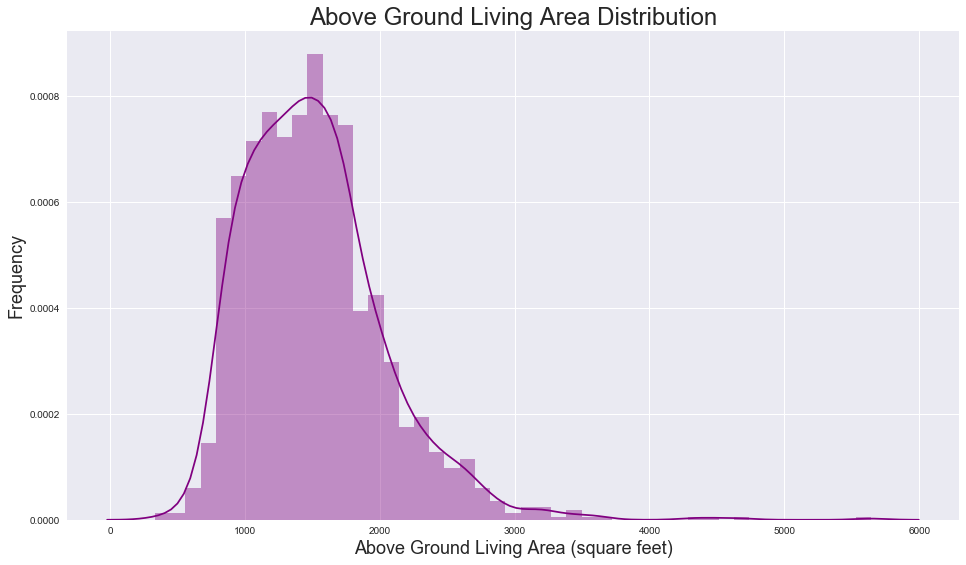

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Above Ground Living Area Distribution', fontsize=24)
sns.distplot(df_train['GrLivArea'], color='purple')
plt.xlabel('Above Ground Living Area (square feet)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.savefig('figures/grade_living_area_distribution_skewed.png')

In [ ]:
print("Skewness: %f" % df_train['GrLivArea'].skew())
print("Kurtosis: %f" % df_train['GrLivArea'].kurt())

Skewness: 1.366560
Kurtosis: 4.895121


We can see that much like the <font color='grey'>__SalePrice__</font> variable, <font color='grey'>__GrLivArea__</font> is also heavily right-skewed distribution. This too will need to be tranformed to induce normality. However, we will leave this transformation for a later section.

Let's now look at the relationship between <font color='grey'>__GrLivArea__</font> and <font color='grey'>__SalePrice__</font>. Convetional wisdom tells us that there should be a strong positive relationship between the two variables.

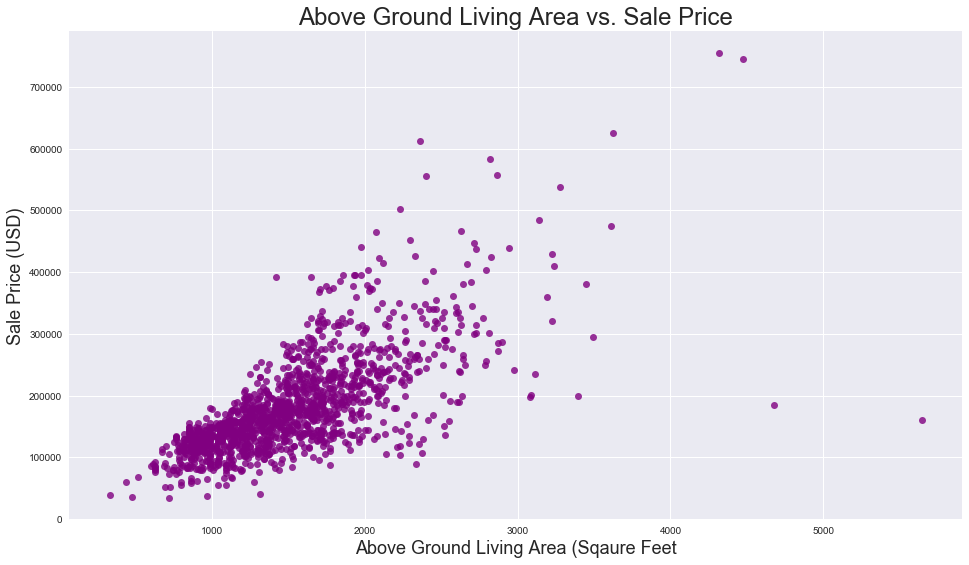

In [ ]:
plt.figure(figsize=(16, 9))
sns.regplot(df_train['GrLivArea'], df_train['SalePrice'], color = "purple" , fit_reg= False)
plt.title('Above Ground Living Area vs. Sale Price', fontsize=24)
plt.xlabel("Above Ground Living Area (Sqaure Feet", fontsize=18)
plt.ylabel("Sale Price (USD)", fontsize=18)
plt.savefig('figures/GrLivArea_vs_SalePrice_scatter.png')

The scatterplot above appears to validate conventional understanding. There appears to be a strong positive linear relationship between <font color='grey'>__GrLivArea__</font> and <font color='grey'>__SalePrice__</font>. More interestingly, there also appears to be some unusually large houses that sold for far less than would otherwise be expected. These two observations look like they have the potential to be outliers. Outliers are problemtic in that they can lead to poor generalisability when using linear estimation models. We will determine how to handle these values a bit later. For now, we have noted their presence. 

The above-ground surface area of the house is not the whole story with regards to size of the house. It would also be wise to consider the below-ground area of a basement. As such, let's explore the relationship between <font color='grey'>__TotalBsmtSF__</font> and <font color='grey'>__SalePrice__</font>.

In [ ]:
df_train['TotalBsmtSF'].describe().to_frame()

,TotalBsmtSF
count,1460.000
mean,1057.429
std,438.705
min,0.000
25%,795.750
50%,991.500
75%,1298.250
max,6110.000


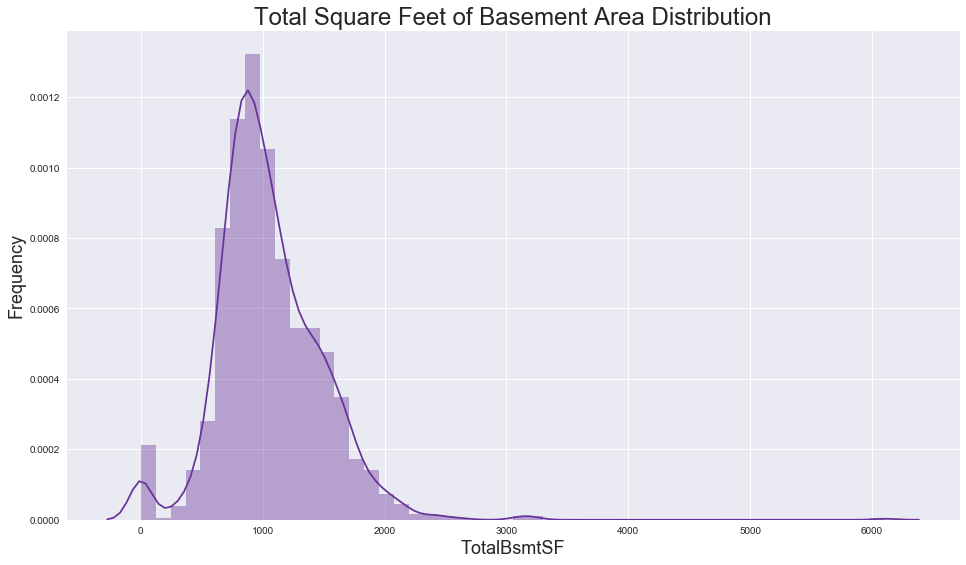

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Total Square Feet of Basement Area Distribution', fontsize=24)
plt.xlabel('Total Square Feet of Basement Area', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
sns.distplot(df_train['TotalBsmtSF'], color="rebeccapurple")
plt.savefig('figures/TotalBsmtSF_distribution_skewed.png')

In [ ]:
print("Skewness: %f" % df_train['TotalBsmtSF'].skew())
print("Kurtosis: %f" % df_train['TotalBsmtSF'].kurt())

Skewness: 1.524255
Kurtosis: 13.250483


It appears as if the right-skewed distribution plague has struck again. However, this time there is a noticable pile-up around zero. This suggests that there a large number of houses with no basements.

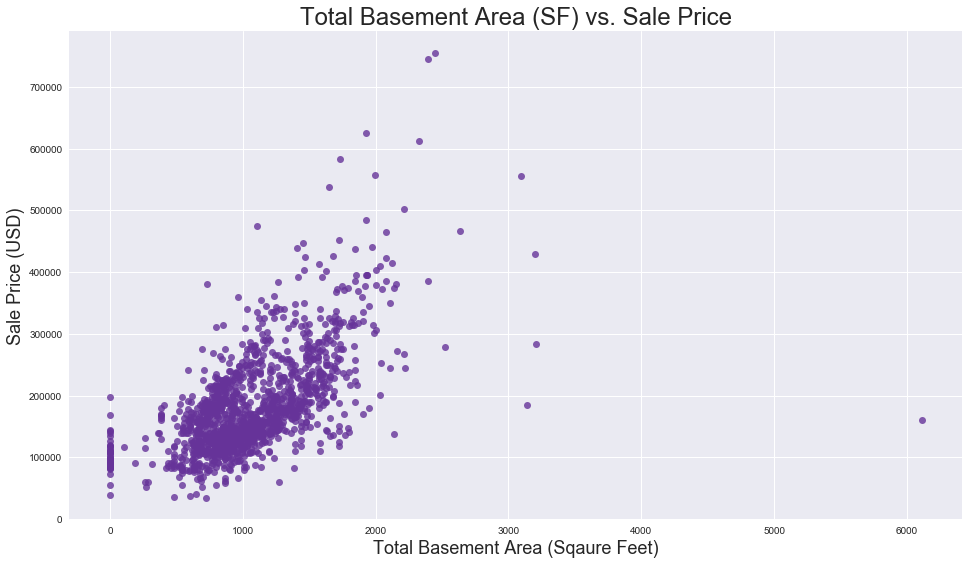

In [ ]:
plt.figure(figsize=(16, 9))
sns.regplot(df_train['TotalBsmtSF'], df_train['SalePrice'], color = "rebeccapurple" , fit_reg= False)
plt.title('Total Basement Area (SF) vs. Sale Price', fontsize=24)
plt.xlabel('Total Basement Area (Sqaure Feet)', fontsize=18)
plt.ylabel("Sale Price (USD)", fontsize=18)
plt.savefig('figures/TotalBsmtSF_vs_SalePrice_scatter.png')

There does appear to be positive linear relationship between the total basement area and final selling price of the house. This relationship appears to be have more variance than the relationship betwen <font color='grey'>__GrLivArea__</font> and <font color='grey'>__SalePrice__</font>. We can again see that a few candidates to be outliers (especially the house with more 6000 sqaure feet).

We have established that the area variables are positively related to <font color='grey'>__SalePrice__</font>. Let's explore how what is contained within the house influences the final selling price. Specifically, let's visualise the relationship between the number of bedrooms and bathrooms within the house and <font color='grey'>__SalePrice__</font>.

In [ ]:
#First off lets create a total bathrooms variable
df_train["TotalBathroom"] = df_train["BsmtFullBath"] + (0.5 * df_train["BsmtHalfBath"]) + df_train["FullBath"] + (0.5 * df_train["HalfBath"])
df_train["TotalBathroom"].describe()

count   1460.000
mean       2.211
std        0.785
min        1.000
25%        2.000
50%        2.000
75%        2.500
max        6.000
Name: TotalBathroom, dtype: float64

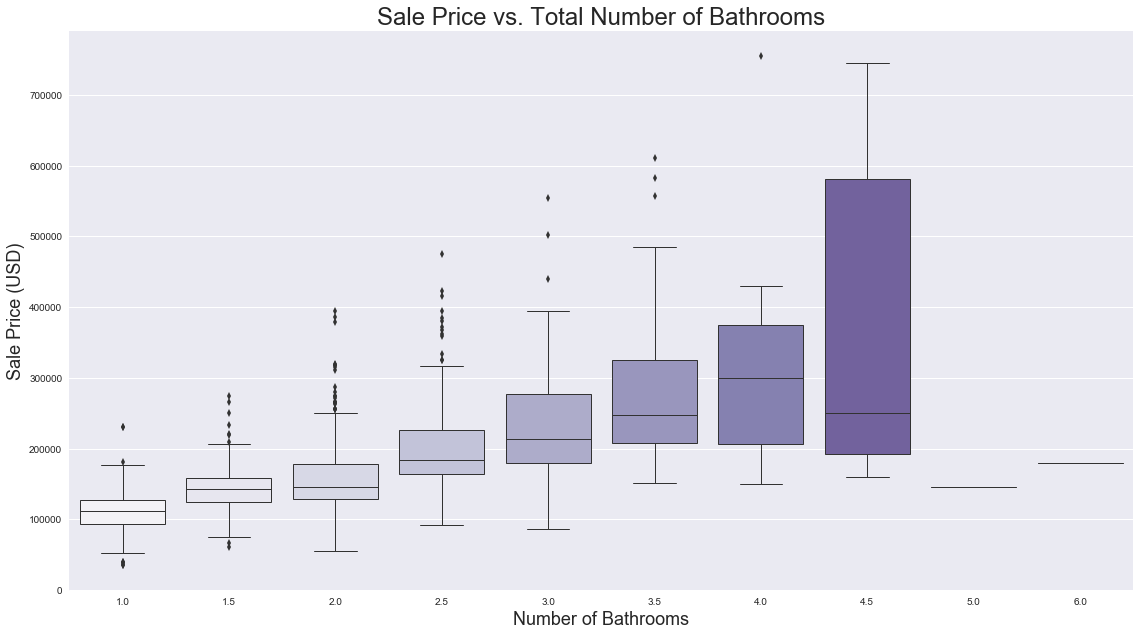

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Sale Price vs. Total Number of Bathrooms', fontsize=24)
sns.boxplot(df_train["TotalBathroom"], df_train['SalePrice'], linewidth=1.0, palette='Purples')
plt.xlabel('Number of Bathrooms', fontsize=18)
plt.ylabel('Sale Price (USD)', fontsize=18)
plt.tight_layout()
plt.savefig('figures/TotalBathrooms_vs_SalePrice_boxplot.png')

The number of bathrooms within a house does appear to be positively related to the price of a house. Interestingly, it appears as if the variation in <font color='grey'>__SalePrice__</font> increases with the number of bathrooms.

In [ ]:
df_train["BedroomAbvGr"].describe()

count   1460.000
mean       2.866
std        0.816
min        0.000
25%        2.000
50%        3.000
75%        3.000
max        8.000
Name: BedroomAbvGr, dtype: float64

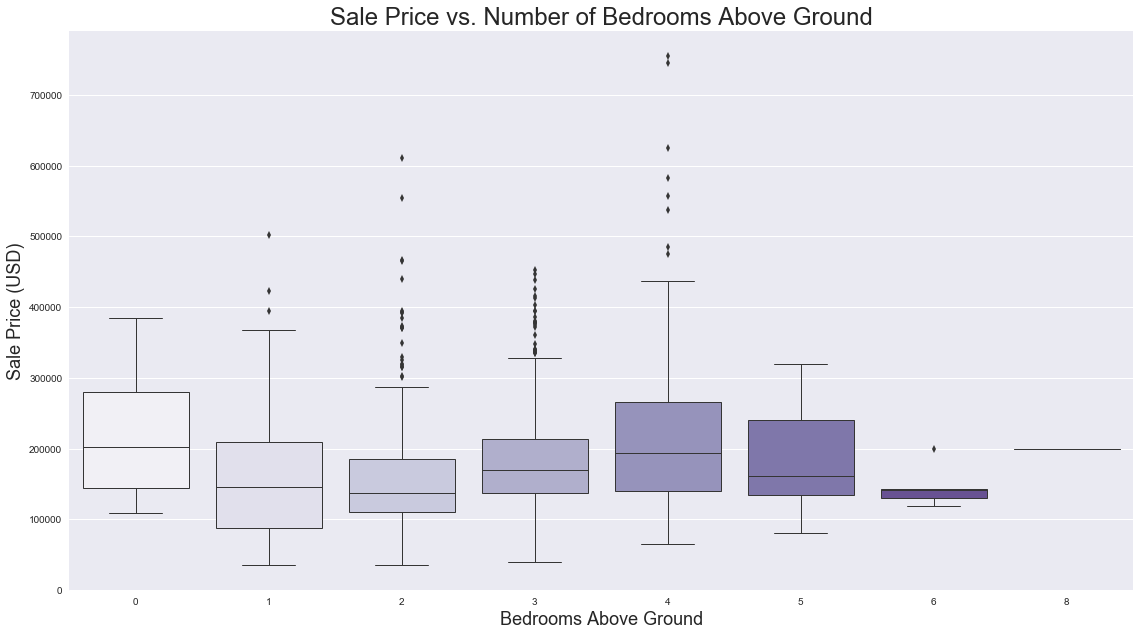

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Sale Price vs. Number of Bedrooms Above Ground', fontsize=24)
fig = sns.boxplot(df_train['BedroomAbvGr'], df_train['SalePrice'], palette='Purples', linewidth=1.0)
plt.xlabel('Bedrooms Above Ground', fontsize=18)
plt.ylabel('Sale Price (USD)', fontsize=18)
plt.tight_layout()
plt.savefig('figures/BedroomAbvGr_vs_SalePrice_boxplot.png')

The relationship between the number of bedrooms within a house and and the <font color='grey'>__SalePrice__</font> is far less clear than than conventional wisdom would suggest. 

Realtors say that location is everything. Houses with desirable postal codes and in affluent areas are expected to command a premium. This dataset has a neighbourhood variable, which should capture much of the effects of location on <font color='grey'>__SalePrice__</font>. 

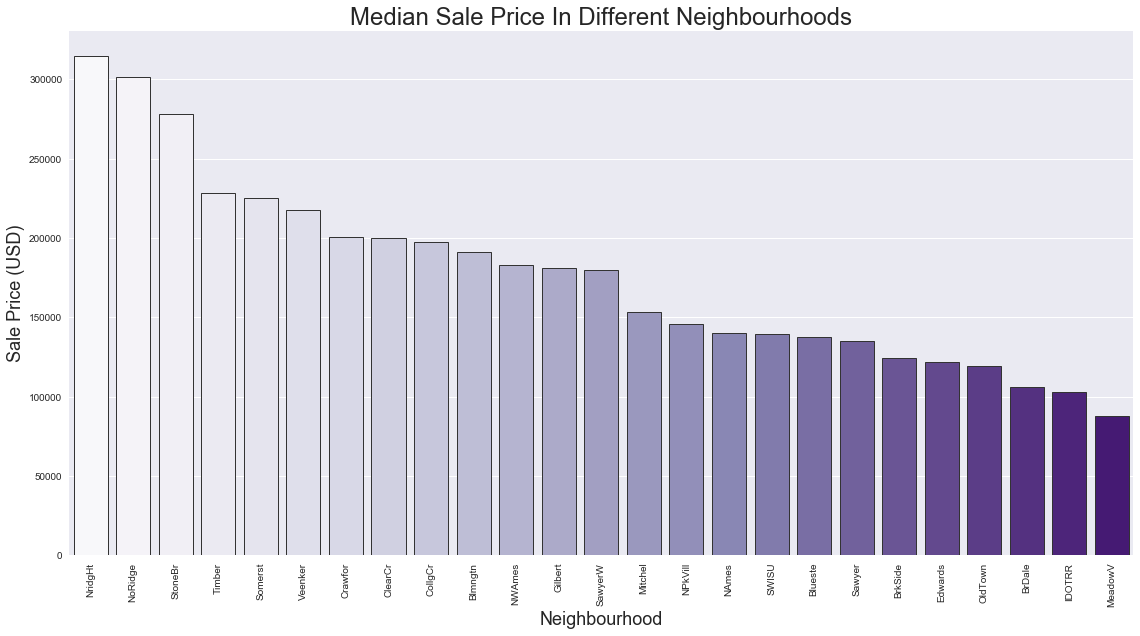

In [ ]:
plt.subplots(figsize=(16, 9))
median_prices=pd.DataFrame(df_train.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False))
sns.barplot(x=median_prices.index, y=median_prices['SalePrice'], palette='Purples', linewidth=1.0, edgecolor=".2")
plt.title('Median Sale Price In Different Neighbourhoods', fontsize=24)
plt.xlabel('Neighbourhood', fontsize=18)
plt.ylabel('Sale Price (USD)', fontsize=18)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('figures/Neighborhood_vs_SalePrice_boxplot.png')

Indeed, it would appear as if the neighborhood has a considerable effect on selling price. In this instance, it appears as if the neighborhoods of _North Ridge_, _North Ridge Heights_, _Stone Brook_ and _Somerset_ are where the affluent individuals of Ames choose to live their best lives.

 The zone in which a house falls is also likely to have an influence on house price, because which person willingly chooses to live near a dirty and noisy industrial area, if they can afford not to?

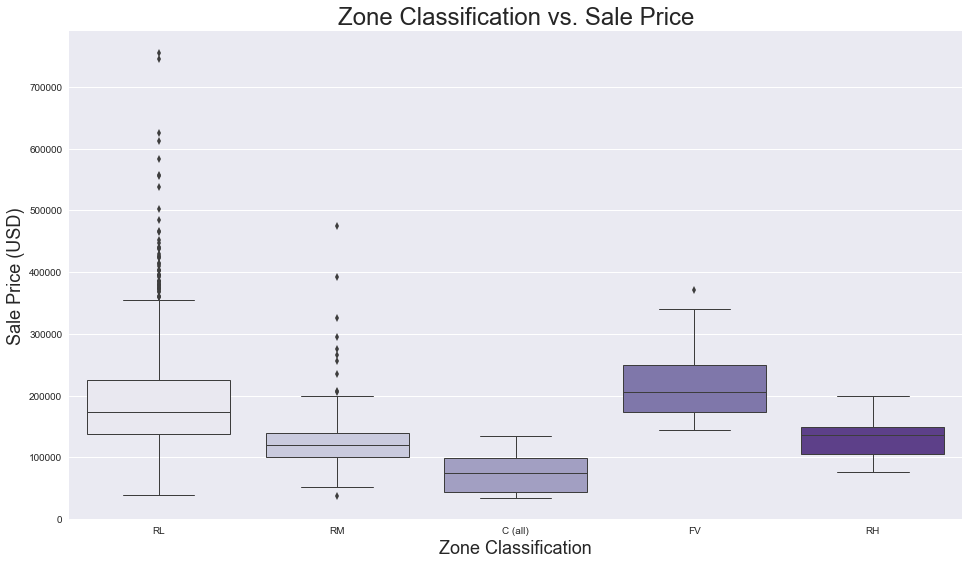

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Zone Classification vs. Sale Price', fontsize=24)
sns.boxplot(df_train["MSZoning"], df_train['SalePrice'], palette='Purples', linewidth=1.0)
plt.xlabel('Zone Classification', fontsize=18)
plt.ylabel('Sale Price (USD)', fontsize=18)
plt.savefig('figures/MSZoning_vs_SalePrice_boxplot.png')

Indeed, it does appear as if buying a house located within a commerical area is not the smartest investment strategy.

What about the age of the house?  A newer house is more likely to have more modern amenities, finishings and architectural designs that may attract a price premium. Older homes may attract a premium for the historical nature of the house. However, they could dated poorly (structurally or stylisitcally).

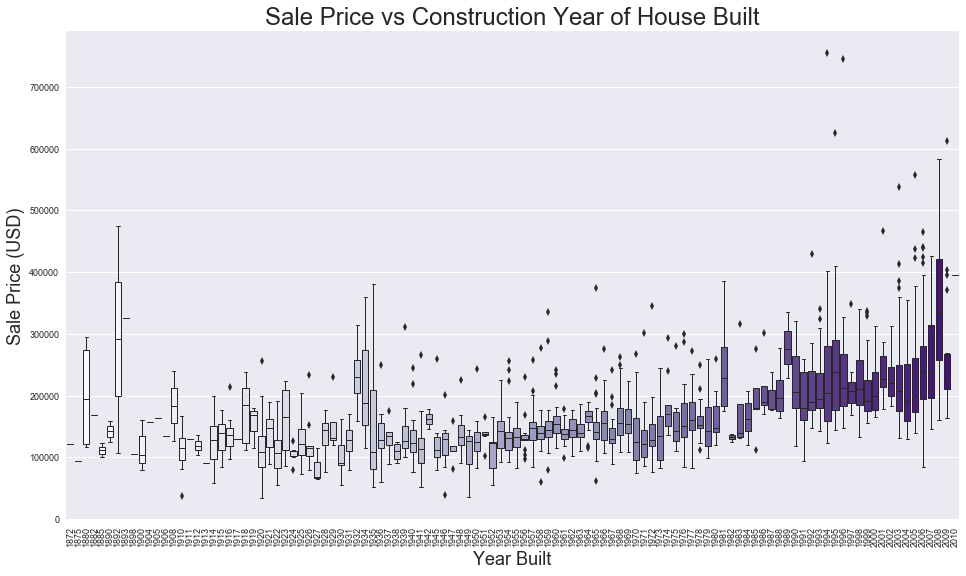

In [ ]:
plt.subplots(figsize=(16, 9))
sns.boxplot(df_train['YearBuilt'], df_train['SalePrice'], palette='Purples', linewidth=1.0)
plt.title('Sale Price vs Construction Year of House Built', fontsize=24)
plt.xlabel('Year Built', fontsize=18)
plt.ylabel('Sale Price (USD)', fontsize=18)
plt.xticks(rotation=90)
plt.tick_params(labelsize=9)
plt.savefig('figures/YearBuilt_vs_SalePrice_boxplot.png')

The boxplot suggests that newer houses are more likely to command a higher price. However, this relationship is not clear cut as houses built pre-1920 also appear to be more expensive on average. This suggest that this relationship is not linear in nature.

How does the the calendar year in which the hosue was sold affect the eventual selling price of the house? We suspect that each year may have its own unique _demand_ and _supply_ dynamics (state of the economy, population movements, political changes etc.). These factors may affect the price of a house in any given year.   

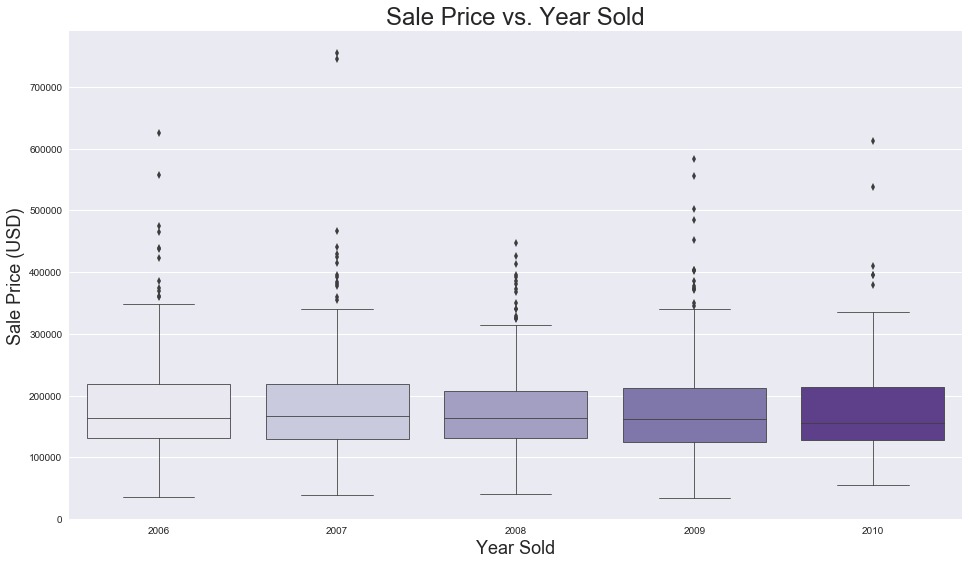

In [ ]:
plt.subplots(figsize=(16, 9))
sns.boxplot(df_train['YrSold'], df_train['SalePrice'], palette='Purples', linewidth=0.8)
plt.title('Sale Price vs. Year Sold', fontsize=24)
plt.xlabel('Year Sold', fontsize=18)
plt.ylabel('Sale Price (USD)', fontsize=18)
plt.savefig('figures/YrSold_vs_SalePrice_boxplot.png')

Amazingly, it appears as if the calendar year in which a house was sold made no noticable difference to the house of prices. Under normal circumstances a lack of large fluctuations in price between years might be particularly suprising. However, the 2008 global financial meltdown, which was fundamentally started by the bursting of the housing asset bubble in the USA, happened over this period. This suggests that the town of Ames was largely unaffected  by the crisis, which is an amazing discovery.

Prevailing real estate wisdom suggests that the quality of the materials used to build the house as well as the quality of the finishings within a house are important determinants of the price. Let's see how well this logic holds up in Ames, using the variable <font color='grey'>__OverallQual__</font> (a measure of the overall quality of the inside of the house).

Text(0,0.5,'Sale Price')

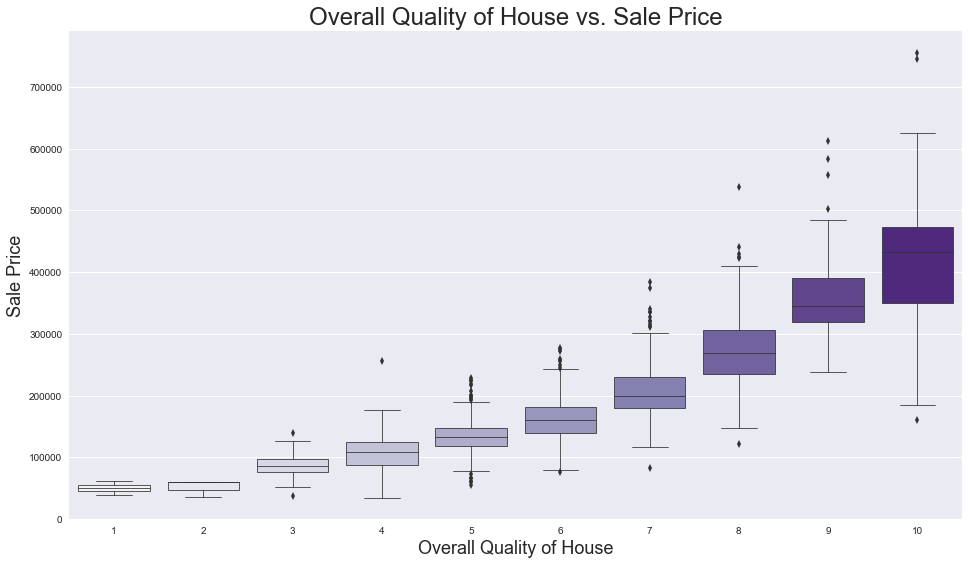

In [ ]:
plt.subplots(figsize=(16, 9))
sns.boxplot(df_train['OverallQual'], df_train['SalePrice'], palette='Purples', linewidth=0.8)
plt.title('Overall Quality of House vs. Sale Price', fontsize=24)
plt.xlabel('Overall Quality of House', fontsize=18)
plt.ylabel('Sale Price', fontsize=18)
# plt.savefig('figures/OverallQual_vs_SalePrice_boxplot.png')

Understandably, there appears to be a strong positive relationship between the o of the house and the final <font color='grey'>__SalePrice__</font>. The relationship appears to take on an almost exponential form. The variation in <font color='grey'>__SalePrice__</font> increases notably with increases in the <font color='grey'>__OverallQual__</font> of the house.

How does the state of upkeep and general condition of the house affect the price?

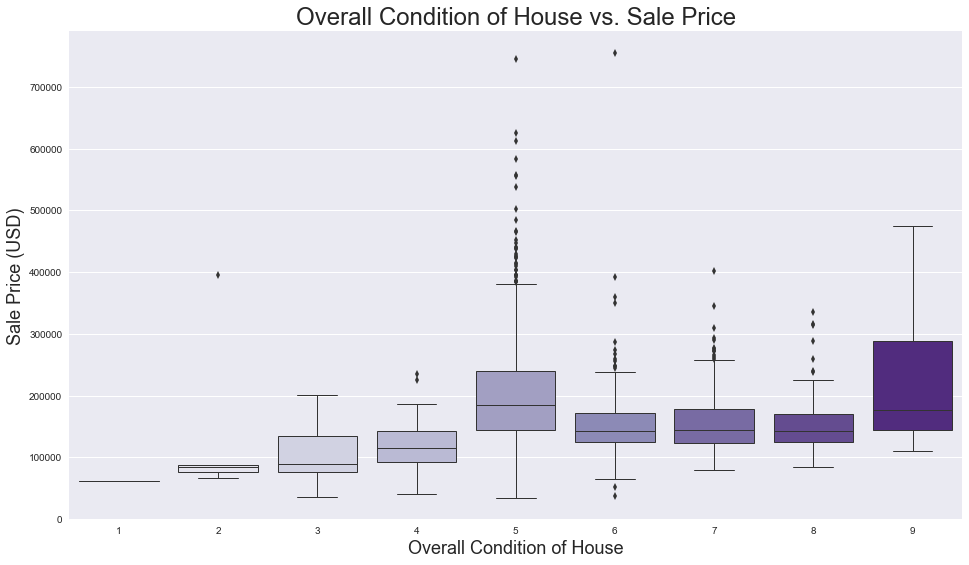

In [ ]:
plt.subplots(figsize=(16, 9))
sns.boxplot(df_train['OverallCond'], df_train['SalePrice'], palette='Purples', linewidth=1.0)
plt.title('Overall Condition of House vs. Sale Price', fontsize=24)
plt.xlabel('Overall Condition of House', fontsize=18)
plt.ylabel('Sale Price (USD)', fontsize=18)
plt.savefig('figures/OverallCond_vs_SalePrice_boxplot.png')

There does appear to be a slightly positive relationship between the condition of the house and price but it doesn't appear to be as clear cut as the realtionship between quality and price.

## Correlations

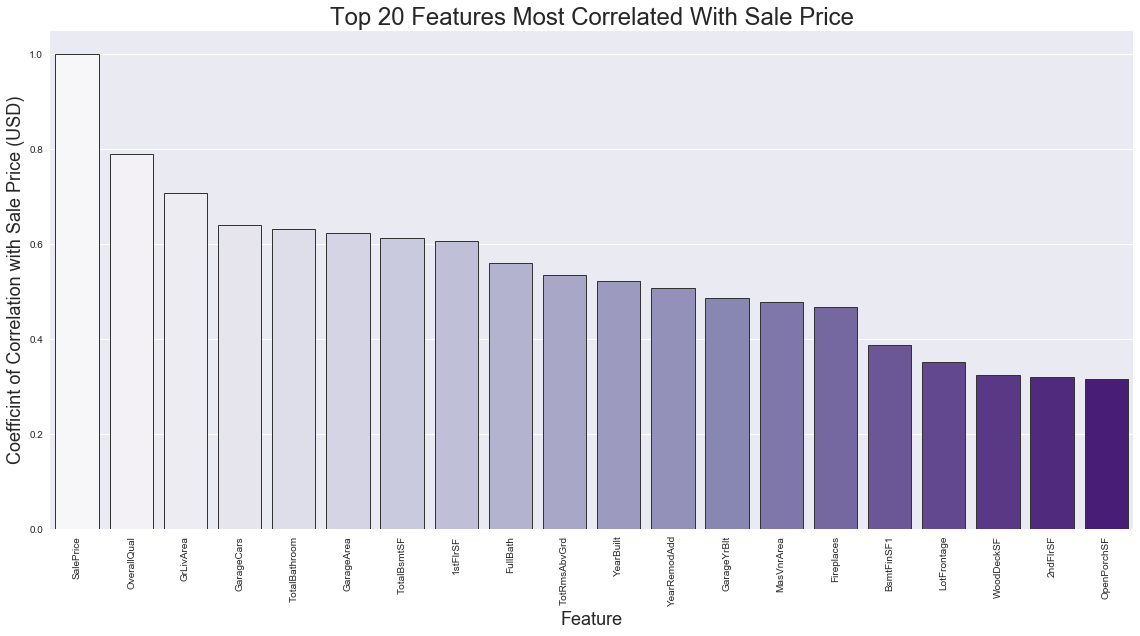

In [ ]:
corr = df_train.corr()['SalePrice'].sort_values(ascending=False).head(20).to_frame()
plt.subplots(figsize=(16, 9))
sns.barplot(x=corr.index, y=corr['SalePrice'], palette='Purples', linewidth=1.0, edgecolor=".2")
plt.title('Top 20 Features Most Correlated With Sale Price', fontsize=24)
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Coefficint of Correlation with Sale Price (USD)', fontsize=18)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('figures/Neighborhood_vs_SalePrice_boxplot.png')

# 4. Preprocessing Data

It is important to ensure that our data is in a format our models can understand and by-in large conforms to the basic assumptions that underpin the linear models that we are going to use. This section will see us perform the necessary quality control checks and make any required adjustments.

## 4.1 Assessing and handling outliers

Okay, so lets return to the noticeable extremes that made themselves obvious when we made our scatterplots. Once again, we will start with the relationship the between <font color='grey'>__GrLivArea__</font> and <font color='grey'>__SalePrice__</font>

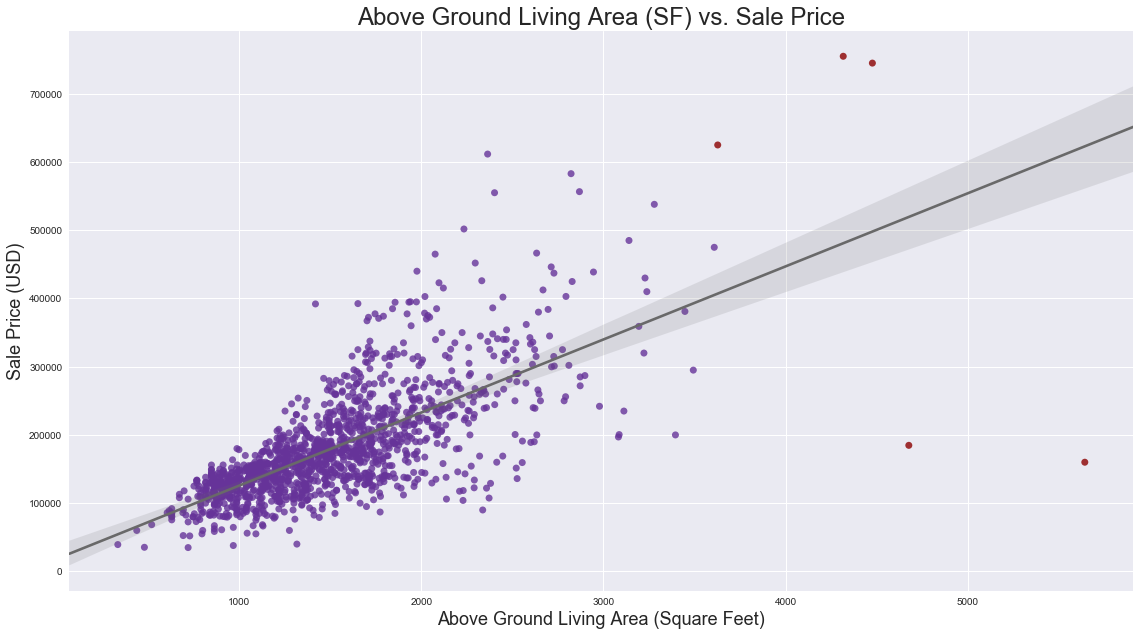

In [ ]:
# Displays A Scatter Plot with Regression Line + Outliers in Red
x_axis = 'GrLivArea'
y_axis = 'SalePrice'

value=(df_train[x_axis]>4000) | (df_train[y_axis]>621000)

plt.figure(figsize=(16, 9))
sns.regplot(df_train['GrLivArea'], df_train['SalePrice'], fit_reg=True,
            scatter_kws={'facecolors':np.where( value==True , "darkred", "rebeccapurple"),
           'edgecolor':np.where( value==True , "darkred", "rebeccapurple")},
           line_kws = {'color': 'dimgrey'})
plt.title('Above Ground Living Area (SF) vs. Sale Price', fontsize=24)
plt.xlabel('Above Ground Living Area (Square Feet)', fontsize=18)
plt.ylabel('Sale Price (USD)', fontsize=18)
plt.tight_layout()
plt.savefig('figures/SalePrice_vs_GrLivArea_regline.png')

There appear to be 5 obvious points on concern. The most concerning are observations 1298 and 523 which have incredibly large living areas but were sold for less 200 000 dollars. The other three points of concern are observations which have large living areas and command the largest valuations. We suspect that these observations are going to distort the generalisability of any linear model we may use. However, we cannot just simply drop becuase they look odd to the eye. As such, we standardise the <font color='grey'>__GrLivArea__</font> variable to see how many standard deviations away from the mean of <font color='grey'>__GrLivArea__</font> each observation is.

In [ ]:
df_train['Above Ground Standardised'] = np.abs(stats.zscore(df_train.GrLivArea))
df_train['Above Ground Standardised'].nlargest(10).to_frame()

,Above Ground Standardised
1298,7.856
523,6.017
1182,5.636
691,5.331
1169,4.020
185,3.984
304,3.765
1268,3.677
635,3.578
769,3.357


We can see that the houses of concern are all more than 4 standard deviations away from the mean of <font color='grey'>__GrLivArea__</font>. In a normal distribution, the rule of thumb is that any obervation that is more than 3 standard deviations away from the mean is an outlier. This case is somewhat more tricky as <font color='grey'>__SalePrice__</font> is heavily right-skewed. This is a large point of concern as they are exceptionally large houses and are likely to skew the results. We now standardise <font color='grey'>__SalePrice__</font> to see how far these observations are away from the mean of <font color='grey'>__SalePrice__</font>.

In [ ]:
df_train['Selling Price Standardised'] = np.abs(stats.zscore(df_train.SalePrice))
df_train[df_train['Above Ground Standardised']>4]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBathroom,Above Ground Standardised,Selling Price Standardised
523,524,60,RL,130.000,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,0,10,2007,New,Partial,184750,4.500,6.017,0.048
691,692,60,RL,104.000,21535,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,1,2007,WD,Normal,755000,4.000,5.331,7.229
1169,1170,60,RL,118.000,35760,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,7,2006,WD,Normal,625000,4.500,4.020,5.592
1182,1183,60,RL,160.000,15623,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,7,2007,WD,Abnorml,745000,4.500,5.636,7.103
1298,1299,60,RL,313.000,63887,Pave,NaN,IR3,Bnk,AllPub,...,NaN,0,1,2008,New,Partial,160000,4.500,7.856,0.263


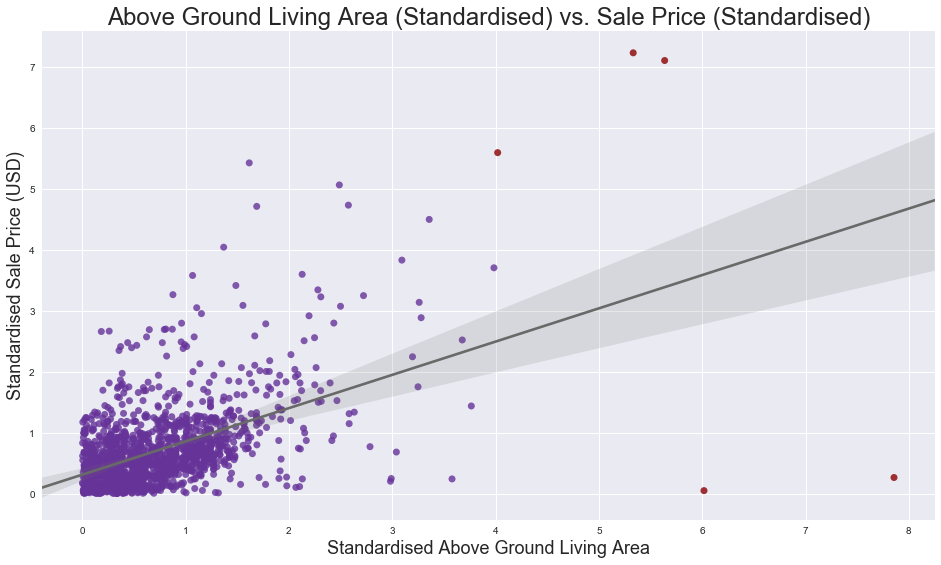

In [ ]:
# Displays A Scatter Plot with Regression Line + Outliers in Red
x_axis = 'Above Ground Standardised'
y_axis = 'Selling Price Standardised'
value=(df_train[x_axis]>4)

plt.figure(figsize=(16, 9))
sns.regplot(df_train['Above Ground Standardised'], df_train['Selling Price Standardised'], fit_reg=True,
            scatter_kws={'facecolors':np.where( value==True , "darkred", "rebeccapurple"),
           'edgecolor':np.where(value==True , "darkred", "rebeccapurple")},
           line_kws = {'color': 'dimgrey'})
plt.title('Above Ground Living Area (Standardised) vs. Sale Price (Standardised)', fontsize=24)
plt.xlabel('Standardised Above Ground Living Area', fontsize=18)
plt.ylabel('Standardised Sale Price (USD)', fontsize=18)
plt.savefig('figures/Standardised_SalePrice_GrLivArea.png')

We can see, from the above, that houses 523 and 1298 are not even a single standard deviation above the <font color='grey'>__SalePrice__</font> mean. This finding suggests that these two houses are in fact leverage points and are likely to diminish a linear model's ability to able to make generalisable predictions. The other three observations (houses 691, 1170 and 1182) are outliers both in terms of both <font color='grey'>__SalePrice__</font> and <font color='grey'>__GrLivArea__</font>.  On the basis of this evidence, we now drop these five houses from the train dataset.

In [ ]:
df_train = df_train.drop(df_train[(df_train['Above Ground Standardised']> 4)].index)
print('Outliers dropped successfully')

Outliers dropped successfully


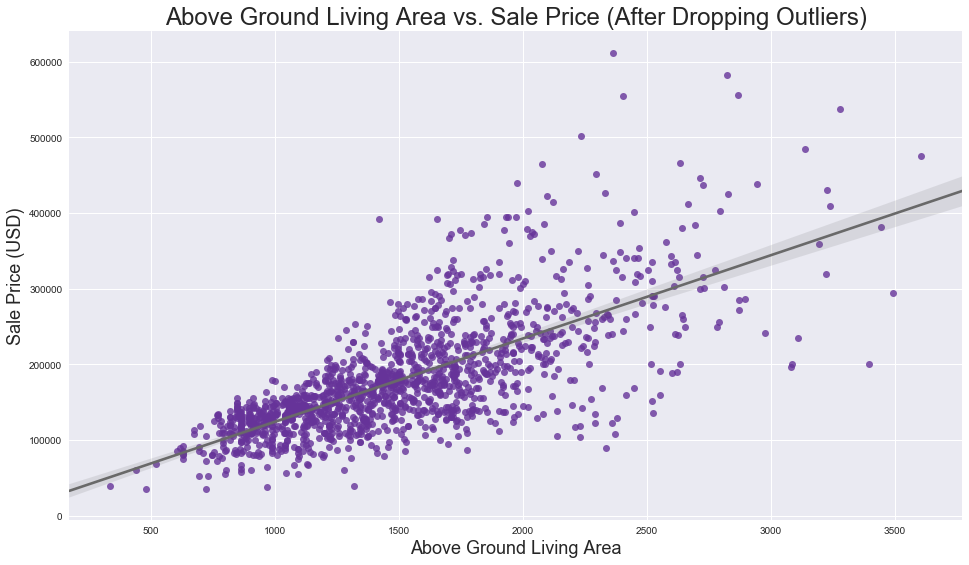

In [ ]:
# Displays A Scatter Plot with Regression Line + Outliers in Red
plt.figure(figsize=(16, 9))
sns.regplot(df_train["GrLivArea"], df_train["SalePrice"], fit_reg=True,
            scatter_kws={'facecolors':"rebeccapurple",
           'edgecolor':"rebeccapurple"},
           line_kws = {'color': 'dimgrey'})
plt.title('Above Ground Living Area vs. Sale Price (After Dropping Outliers)', fontsize=24)
plt.xlabel('Above Ground Living Area', fontsize=18)
plt.ylabel('Sale Price (USD)', fontsize=18)
plt.savefig('figures/Above_ground_dropped.png')

We have now successfully dropped the houses of concern. We can see that as a result of our dropping outlier values, the slope of the line of best fit has increased and now more closely approximates our data.

We continue to look at scatterplot of the <font color='grey'>__TotalBsmtSF__</font> against <font color='grey'>__SalePrice__</font> to see if there still potential outliers in this variable.

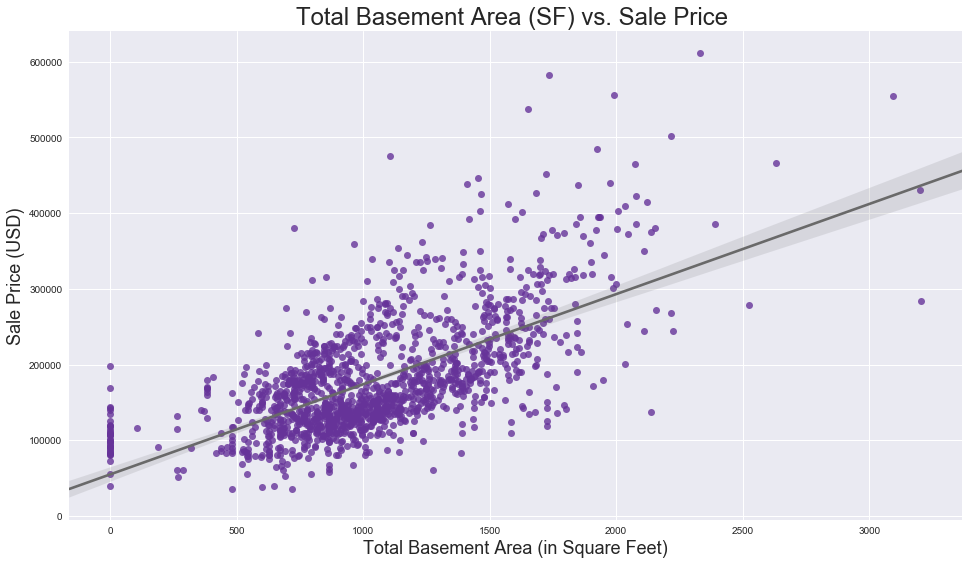

In [ ]:
plt.figure(figsize=(16, 9))

# plot
sns.regplot(df_train['TotalBsmtSF'], df_train['SalePrice'], fit_reg=True, 
            scatter_kws={'facecolors':"rebeccapurple",
           'edgecolor':"rebeccapurple"},
           line_kws = {'color': 'dimgrey'})
plt.title('Total Basement Area (SF) vs. Sale Price ', fontsize=24)
plt.xlabel('Total Basement Area (in Square Feet)', fontsize=18)
plt.ylabel('Sale Price (USD)', fontsize=18)
plt.savefig('figures/Basement_SalePrice_scatter.png')

It appears as if the trouble observations in the <font color='grey'>__GrLivArea__</font> were the same cuplrits for <font color='grey'>__TotalBsmtSF__</font>. We have now concluded our hunt for outliers. We must quickly drop the variables we have created to do our EDA.

In [ ]:
#Drop all constructed variables for now
df_train = df_train.drop(['Above Ground Standardised','Selling Price Standardised', "TotalBathroom"], axis = 1)

As such, we conclude our hunt for outliers and turn to have a quick at which predictor variables have the highest correlation with <font color='grey'>__SalePrice__</font>.

## 4.2 Creating a single dataset

We are going to combine the train and test datasets for ease of manipulation and to ensure that there is consistency in the handling of our data.

In [ ]:
#Create a place holder for where the train dataset ends and the test set begins
df_train_ends = df_train.shape[0]

#Duplicate our train and test sets to ensure we don't mistakenly overwrite them
df_train1 = df_train.copy()
df_test1 = df_test.copy()
df_total = pd.concat((df_train1, df_test1))
df_total = df_total.drop('Id', axis = 1 )

## 4.3 Looking for anomalies

In this section, we will do a quick sense check to make sure there are no anomalous values in any of the variables in which we are certain of the intervals that a value can take.

Ames was founded __1858__, so it would be impossible for a house to be built before then. Coversely, this dataset was constructed in __2010__. As such, it would be impossible for a house to be built after __2010__. The dataset is supposed to represent house sales between __2006__ and __2010__.

In [ ]:
print("There are {} anomalies in the YearBuilt variable". format(df_total[(df_total['YearBuilt'] > 2010) | (df_total['YearBuilt'] < 1858)]['YearBuilt'].count()))
print("There are {} anomalies in the YearRemodAdd variable". format(df_total[(df_total['YearRemodAdd'] > 2010) | (df_total['YearRemodAdd'] < 1858)]['YearRemodAdd'].count()))
print("There are {} anomalies in the GarageYrBlt variable". format(df_total[(df_total['GarageYrBlt'] > 2010) | (df_total['GarageYrBlt'] < 1858)]['GarageYrBlt'].count()))
print("There are {} anomalies in the YrSold variable". format(df_total[(df_total['YrSold'] > 2010) | (df_total['YrSold'] < 2006)]['YrSold'].count()))

There are 0 anomalies in the YearBuilt variable
There are 0 anomalies in the YearRemodAdd variable
There are 1 anomalies in the GarageYrBlt variable
There are 0 anomalies in the YrSold variable


We need to fix the anomalie in <font color='grey'>__GarageYrBlt__</font>

In [ ]:
df_total[(df_total['GarageYrBlt'] > 2010) | (df_total['GarageYrBlt'] < 1858)][['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]

,YearBuilt,YearRemodAdd,GarageYrBlt
1132,2006,2007,2207.000


In [ ]:
#It is clear that 2207 is supposed to be 2007
df_total.loc[1132,'GarageYrBlt'] = '2007'

## 4.4 Dealing with missing values

In [ ]:
df_total_na = (df_total.isnull().sum() / len(df_total)) * 100
df_total_na = df_total_na.drop(df_total_na[df_total_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Percentage of data missing' :df_total_na})
missing_data.head(20)

,Percentage of data missing
PoolQC,99.725
MiscFeature,96.397
Alley,93.205
Fence,80.439
SalePrice,50.069
FireplaceQu,48.730
LotFrontage,16.678
GarageQual,5.456
GarageCond,5.456
GarageFinish,5.456


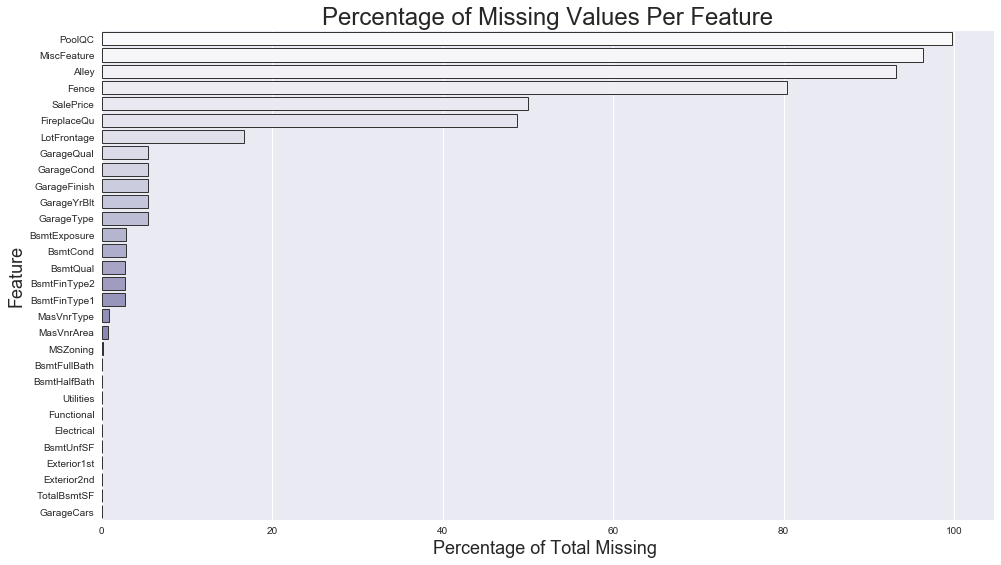

In [ ]:
# Horizontal bar graph
plt.figure(figsize=[16, 9])
plt.title('Percentage of Missing Values Per Feature', fontsize=24)
sns.barplot(missing_data['Percentage of data missing'], y=missing_data.index, data=missing_data, 
            palette='Purples', linewidth=1.0, edgecolor=".2")
plt.xlabel('Percentage of Total Missing ', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.savefig('figures/percentage.png')

As can be seen above, there a few variables that have missing values. It is tempting to simply drop these variables. However, this is not the approach we will follow as dropping variables could result in the loss of important variaition between houses. Instead, we try to find the most logical manner in which to impute values for these missing values.

In order to impute values the following approach will be undertaken:
- **LotArea**: The shape and area of the land plots is likely to vary by neighbourhood. We will impute for the missing         value by taking the median value of the particular neighbourhood in which the house is located.
- **MSZoning (The general zoning classification)** : The MS zone is likely to vary by neighbourhood. We will impute for the     missing value by taking the modal value of the particular neighbourhood in which the house is located.
- **MSSubClass** : The MS sub class is likely to vary by neighbourhood. We will impute for the missing value by taking the     modal value of the particular neighbourhood in which the house is located.
- **GarageYrBlt**: The missing values will replaced with the same year value as the one found in the YearBuilt variable
- **Utilities** : The missing values will be imputed by the modal value
- **Functional** : The missing values will be imputed by the modal value
- **Electrical** : The missing values will be imputed by the modal value
- **KitchenQual**: The missing values will be imputed by the modal value
- **Exterior1st and Exterior2nd** : The missing values will be imputed by the modal value
- **SaleType** : The missing values will be imputed by the modal value
- **Remaining catergorical variables with missing values**: Missing variables replaced with None. Implicit in this             imputation is the assumption that NA actually means that the particular characteristic is not present for that house. 
- **Remaining numerical variables**: Missing values will replaced with 0. Again the implicit assumption here is that the NA     means that the feature is not present and therefore its quantitative mesurement should be 0

In [ ]:
df_total['LotFrontage'] = df_total.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
#df_total['MSZoning'] = df_total.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()))
df_total['MSZoning'] = df_total['MSZoning'].fillna(df_total['MSZoning'].mode()[0])

In [ ]:
df_total['MSSubClass'] = df_total.groupby('Neighborhood')['MSSubClass'].transform(lambda x: x.fillna(x.mode()))

In [ ]:
df_total['GarageYrBlt'] = df_total['GarageYrBlt'].fillna(df_total['YearBuilt'])

In [ ]:
modes = ["Functional", 'Electrical', "Utilities",'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in modes:
    df_total[col] = df_total[col].fillna(df_total[col].mode()[0])

In [ ]:
cats = ["PoolQC", "Fence", "MiscFeature", "Alley", "FireplaceQu", "MasVnrType", 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in cats:
    df_total[col] = df_total[col].fillna('None')     

In [ ]:
nums = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
for col in nums:
    df_total[col] = df_total[col].fillna(0)
print('Finished imputing')

Finished imputing


We need to check that there are no longer any missing values in the dataset. 

In [ ]:
df_total_na = (df_total.isnull().sum() / len(df_total)) * 100
df_total_na = df_total_na.drop(df_total_na[df_total_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Percentage missing' :df_total_na})
missing_data.head()

,Percentage missing
SalePrice,50.069


We can see that the only variable left with missign values is <font color='grey'>__SalePrice__</font> which is expected as it is our target variable

## 4.5 Numerical to Catergorical

Some of the variables within this dataset are represented as _numerical_ values. However, in truth, they are in fact _categorical_ variables and need to be altered before we can take dummy variables.

In [ ]:
df_total['MSSubClass'] = df_total['MSSubClass'].apply(str)

#Year and month sold are transformed into categorical features.
df_total['YrSold'] = df_total['YrSold'].astype(str)
df_total['MoSold'] = df_total['MoSold'].astype(str)

## 4.6 Label Encoding

We are now looking for variables that have ordinal characteristics, wherein a hierarchy can inferred. In this section, we change the relevant variables from categorical variables to label-encoded variables which keep the inherent ordinality of the values.

We start with the quality - related variables. The order of quality preference is very easily inferred. If the charactersitic is missing (has a '__None__' value) it is assigned a value of 0. The label that represents the _lowest quality_ is given a value of 1 whilst the _highest quality_ is assigned a 5.

In [ ]:
df_total = df_total.replace({"BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "No" : 1, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 1, "Rec" : 2, "BLQ" : 3, 
                                         "ALQ" : 4, "GLQ" : 5},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 1, "Rec" : 2, "BLQ" : 3, 
                                         "ALQ" : 4, "GLQ" : 5},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        'GarageFinish' : {"None" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "PoolQC" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}, 
                        "CentralAir" : {"N" : 0, "Y" : 1}})

We now move onto variables where some additional thought is required. Some domain knowledge of real estate and residential construction would be particularly useful for the purposes of correctly encoding the relevant variables. We shall our common-sense and judegement to attempt to correctly capture the ordering for these particular variables.

One would assume that paved features is preferable to a gravel features. As such we infer ordinality in that paved > gravel

In [ ]:
df_total = df_total.replace({"Alley" : {"None" :0, "Grvl" : 1, "Pave" : 2}, "PavedDrive" : {"N" : 1, "P" : 2, "Y" : 3},
                             "Street" : {"Grvl" : 1, "Pave" : 2}})

In [ ]:
df_total = df_total.replace({"LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3} , 
                             "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4}})

In [ ]:
df_total = df_total.replace({"Functional" : {"Sal" : 0, "Sev" : 1, "Maj2" : 2, "Maj1" : 2, "Mod":3, 
                                       "Min2" : 4, "Min1" : 4, "Typ" : 5}})

In [ ]:
df_total = df_total.replace({"Electrical" : {"FuseP" : 1, "FuseF" : 2, "FuseA" : 3, "Mix" : 4, "SBrkr" : 5},
                            'Utilities': {'NoSeWa':0, "AllPub": 1}})

All the relevent ordinal variables have been appropriately label-encoded and can now be understood by our model

Finally, we will bin our quality-related variables into smaller and more distinct bins. This should help the model to better distinguish larger differences in quality and its effect of <font color='grey'>__SalePrice__</font>.

In [ ]:
df_total['OverallQual_simple'] = df_total.OverallQual.replace({1:1, 2:1, 3:1, # bad quality
                                                        4:2, 5:2, 6:2, # mediocre quality
                                                        7:3, 8:3, 9:3, 10:3 # good quality
                                                       })
df_total['OverallCond_simple'] = df_total.OverallCond.replace({1:1, 2:1, 3:1, # bad quality
                                                        4:2, 5:2, 6:2, # mediocre quality
                                                        7:3, 8:3, 9:3, 10:3 # good quality
                                                       })
# convert from categorical to ordinal with smaller groups
df_total['ExterQual_simple'] = df_total.ExterQual.replace({5:3, 4:3, 3:2, 2:2, 1:1})
df_total['ExterCond_simple'] = df_total.ExterCond.replace({5:3, 4:3, 3:2, 2:2, 1:1})
df_total['BsmtQual_simple'] = df_total.BsmtQual.replace({5:3, 4:3, 3:2, 2:2, 1:1})
df_total['BsmtCond_simple'] = df_total.BsmtCond.replace({5:3, 4:3, 3:2, 2:2, 1:1})
df_total['BsmtFinType1_simple'] = df_total.BsmtFinType1.replace({6:3, 5:3, 4:2, 3:2, 2:1, 1:1})
df_total['BsmtFinType2_simple'] = df_total.BsmtFinType2.replace({6:3, 5:3, 4:2, 3:2, 2:1, 1:1})
df_total['HeatingQC_simple'] = df_total.HeatingQC.replace({5:3, 4:3, 3:2, 2:2, 1:1})
df_total['KitchenQual_simple'] = df_total.KitchenQual.replace({5:3, 4:3, 3:2, 2:2, 1:1})
df_total['Functional_simple'] = df_total.Functional.replace({8:4, 7:3, 7:3, 6:3, 5:2,4:2, 3:1, 2:1})
df_total['GarageQual_simple'] = df_total.GarageQual.replace({5:3, 4:3, 3:2, 2:2, 1:1})
df_total['GarageCond_simple'] = df_total.GarageCond.replace({5:3, 4:3, 3:2, 2:2, 1:1})
df_total['PoolQC_simple'] = df_total.PoolQC.replace({5:3, 4:3, 3:2, 2:2, 1:1})
df_total['FireplaceQu_simple'] = df_total.FireplaceQu.replace({5:3, 4:3, 3:2, 2:2, 1:1})

## 4.7 Removing multicollinear variables

One of the fundamental assumptions of linear regression models is that assumption of no _multi-collinearity_ says that there should be no linear relationship between the independent variables. Leaving variables that are highly collinear in the dataset is likely to distort predictive accuracy of our model.

We need to identify highly-correlated independant variables and drop the one that lowest correlation with <font color='grey'>__SalePrice__</font>. For the purposes of this kernel, any independent variables with a corrleation of more than 0.8 will be considerd as being collinear.

The variables designated to be dropped will be dropped at the end of the [Feature Engineering](#FeatureEngineering) section

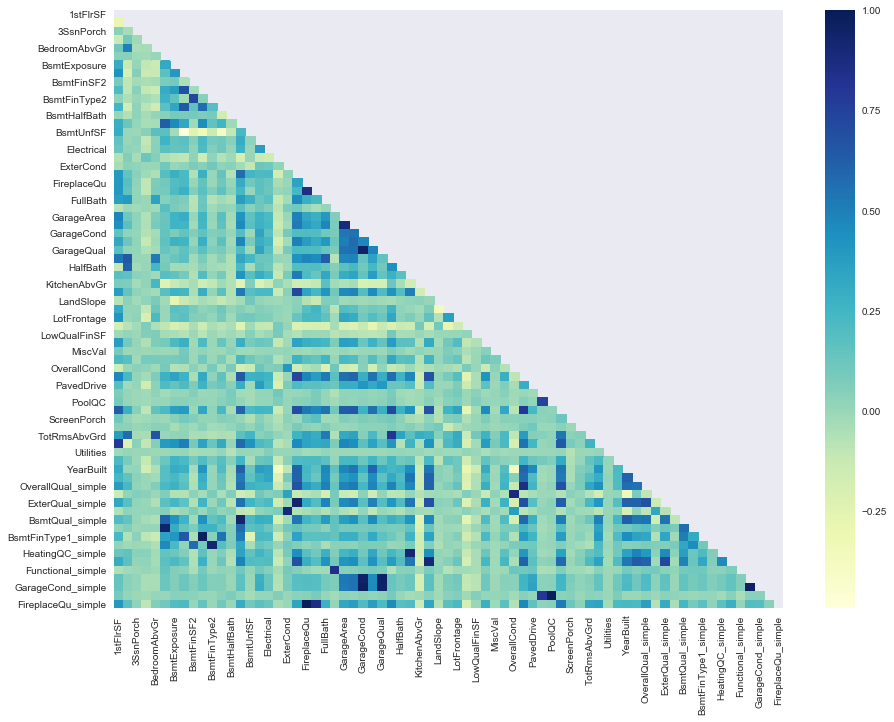

In [ ]:
corr = df_total.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(15, 11))
with sns.axes_style('dark'):
    ax = sns.heatmap(corr, mask=mask, cmap="YlGnBu")
plt.savefig('figures/corrmat.png')

We will specifically look at the correlations of variables that represent the same of similar characteristics of a house

In [ ]:
garage = df_total[['GarageArea','GarageCars','GarageCond', 'GarageFinish', 'GarageQual', 'GarageType']]
corr = garage.corr()
corr[corr>0.8]

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual
GarageArea,1.000,0.892,nan,nan,nan
GarageCars,0.892,1.000,nan,nan,nan
GarageCond,nan,nan,1.000,nan,0.947
GarageFinish,nan,nan,nan,1.000,nan
GarageQual,nan,nan,0.947,nan,1.000


We can see from the above that <font color='grey'>__GarageCondition__</font> and <font color='grey'>__GarageQual__</font> are highy correlated. This is also the case for <font color='grey'>__GarageArea__</font> and <font color='grey'>__GarageCars__</font>. In this instance, we will keep the <font color='grey'>__GarageQual__</font> and <font color='grey'>__GarageCars__</font> variables and drop the other two from the dataset. 

In [ ]:
SF = df_total[['TotRmsAbvGrd','GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'TotalBsmtSF']]
corr = SF.corr()
corr[corr>0.8]

,TotRmsAbvGrd,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF,TotalBsmtSF
TotRmsAbvGrd,1.000,0.812,nan,nan,nan,nan
GrLivArea,0.812,1.000,nan,nan,nan,nan
1stFlrSF,nan,nan,1.000,nan,nan,nan
2ndFlrSF,nan,nan,nan,1.000,nan,nan
LowQualFinSF,nan,nan,nan,nan,1.000,nan
TotalBsmtSF,nan,nan,nan,nan,nan,1.000


We can see that the correlation between Total Rooms Above Ground and the Above Ground SF is 0.81. As such, we gave chosen to drop the '<font color='grey'>__TotRmsAbvGrd__</font>' variable.

Although not individually highly correlated with <font color='grey'>__GrLivArea__</font>, collectively <font color='grey'>__1stFlrSf__</font>, <font color='grey'>__2ndFlrSf__</font> and <font color='grey'>__LowQualFinSF__</font> are perfectly correlated with <font color='grey'>__GrLivArea__</font>.

In [ ]:
df_total['AboveSF'] = df_total['1stFlrSF'] + df_total['2ndFlrSF'] + df_total['LowQualFinSF']
df_total[['AboveSF', 'GrLivArea']].corr()

,AboveSF,GrLivArea
AboveSF,1.000,1.000
GrLivArea,1.000,1.000


Given this information, we will need to drop one the above variables. In this case, we will the <font color='grey'>__2ndFlrSF__</font> variable as it has a stronger correlation with <font color='grey'>__GrLivArea__</font> than the others and a lower correlation with <font color='grey'>__SalePrice__</font> than <font color='grey'>__1stFlrSf__</font>

In [ ]:
year = df_total[df_total['GarageYrBlt']!='None'][['YearBuilt','YearRemodAdd', 'GarageYrBlt']]
year['GarageYrBlt'] = year['GarageYrBlt'].astype(int)
year.corr()

,YearBuilt,YearRemodAdd,GarageYrBlt
YearBuilt,1.000,0.612,0.858
YearRemodAdd,0.612,1.000,0.624
GarageYrBlt,0.858,0.624,1.000


The correlation between <font color='grey'>__YearBuilt__</font> and <font color='grey'>__GarageYrBlt__</font> is quite high. We will drop <font color='grey'>__GarageYrBlt__</font> from the dataset.

In [ ]:
basement = df_total[["BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 'BsmtFinSF1', 'BsmtFinSF2', "BsmtQual", 'TotalBsmtSF', '1stFlrSF']]
corr = basement.corr()
corr[corr>0.8]

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtQual,TotalBsmtSF,1stFlrSF
BsmtCond,1.000,nan,nan,nan,nan,nan,nan,nan,nan
BsmtExposure,nan,1.000,nan,nan,nan,nan,nan,nan,nan
BsmtFinType1,nan,nan,1.000,nan,nan,nan,nan,nan,nan
BsmtFinType2,nan,nan,nan,1.000,nan,nan,nan,nan,nan
BsmtFinSF1,nan,nan,nan,nan,1.000,nan,nan,nan,nan
BsmtFinSF2,nan,nan,nan,nan,nan,1.000,nan,nan,nan
BsmtQual,nan,nan,nan,nan,nan,nan,1.000,nan,nan
TotalBsmtSF,nan,nan,nan,nan,nan,nan,nan,1.000,nan
1stFlrSF,nan,nan,nan,nan,nan,nan,nan,nan,1.000


<font color='grey'>__BsntFinType2__</font> will be dropped from the dataset to avoid the collective collinearity issue

In [ ]:
quality = df_total[["ExterCond", "ExterQual", "FireplaceQu", "GarageQual", "HeatingQC", "KitchenQual", "OverallQual", 'OverallCond']]
corr = quality.corr()
corr[corr>0.8]

,ExterCond,ExterQual,FireplaceQu,GarageQual,HeatingQC,KitchenQual,OverallQual,OverallCond
ExterCond,1.000,nan,nan,nan,nan,nan,nan,nan
ExterQual,nan,1.000,nan,nan,nan,nan,nan,nan
FireplaceQu,nan,nan,1.000,nan,nan,nan,nan,nan
GarageQual,nan,nan,nan,1.000,nan,nan,nan,nan
HeatingQC,nan,nan,nan,nan,1.000,nan,nan,nan
KitchenQual,nan,nan,nan,nan,nan,1.000,nan,nan
OverallQual,nan,nan,nan,nan,nan,nan,1.000,nan
OverallCond,nan,nan,nan,nan,nan,nan,nan,1.000


None of the quality-related variablese will be dropped from the dataset

##  4.8 Transformation of SalePrice

We mentioned earlier that the <font color='grey'>__SalePrice__</font> was heavily right-skewed. This poses a problem as regression models assume residuals (differences between observed and predicted values) are normally distributed across all levels of the independent variables and their variance is constant. This is unlikely to be the case with such a heavily skewed depeandent distribution.

Lets have another look at the distribution of '<font color='grey'>__SalePrice__</font>'. We will validate our understanding of its skew using a Q-Q plot. This is a scatterplot that is created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight.

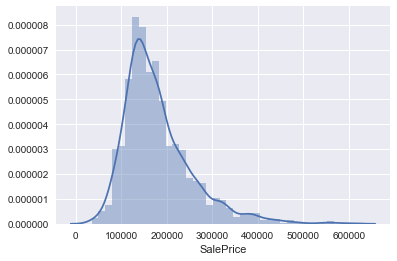

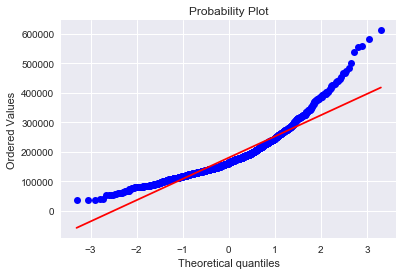

In [ ]:
sns.distplot(df_train['SalePrice'])
fig = plt.figure()

#Plotting the Q-Q plot
res = stats.probplot(df_train['SalePrice'], plot=plt)

Looking at the above, '<font color='grey'>__SalePrice__</font>' needs to be transformed. Taking the logarithm of a skewed variable is likely to allow us to improve the fit by altering the scale and making '<font color='grey'>__SalePrice__</font>' more "normally" distributed and stabilise its spread.

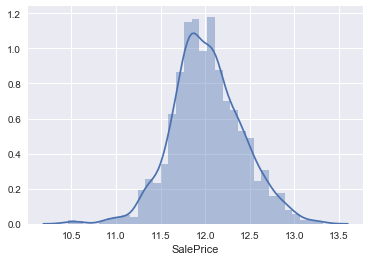

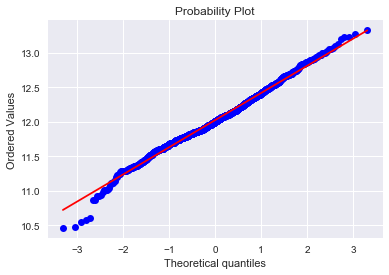

In [ ]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
y = df_train.SalePrice

# Plotting distribution of log-transformed y
sns.distplot(y);
fig = plt.figure()

#Plot the Q-Q plot
res = stats.probplot(y, plot=plt)

It appears as if log-transfroming '<font color='grey'>__SalePrice__</font>' has achieved our desired result. '<font color='grey'>__SalePrice__</font>' now far more closely approximates a true nromal distribution. There is some slight deviation at the lower-end of the distribution. Removing some extreme values at this end of the distribution might help the distribution approximate a normal distribution even moe closely. However, we haven't found any statistical evidence to justify purging these values and wel will leave this distribution as is.

## 4.9 Transformation of skewed feature variables

Our EDA analysis revealed that <font color='grey'>__SalePrice__</font> was not the only variable that exhibited a significant right-skew. Many of our continuous predictor variables are likely to have skewed distributions. Skewed predictor variables can pose problems for linear models as it also likely to result in non-normally distributed residuals. We will need to make use of liner transformation on these variables. 

The probability plot shows us the log-transformed distribution of <font color='grey'>__SalePrice__</font> closely approximates a normal distribution, bar maybe the extreme lower values for <font color='grey'>__SalePrice__</font> 

In this case, rather than taking performing a log-transformation on these variables, we make use of the __Box-Cox__ transformation to linearise the distribution of these variables.

In [ ]:
categorical_features = df_total.select_dtypes(include = ["object"]).columns
numerical_features = df_total.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
price = df_total['SalePrice']
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df_total_num = df_total[numerical_features]
df_total_cat = df_total[categorical_features]

Numerical features : 71
Categorical features : 24


In [ ]:
skewness = df_total_num.apply(lambda x: skew(x))

#We assume that any variable that exhibits skewness greater than 0.5 is likely to pose problems and needs to transformed
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features need to be transform")
skewed_features = skewness.index

# The optimal lambda used here was taken from the calculations used by other notebooks.
df_total_num[skewed_features] = boxcox1p(df_total_num[skewed_features], 0.15)

57 skewed numerical features need to be transform


In [ ]:
df_total = pd.concat([df_total_num, df_total_cat, price], axis = 1)

In [ ]:
print('There are currently {} total variables'.format(df_total.shape[1]))

There are currently 96 total variables


# 5. Feature Engineering <a id='FeatureEngineering'></a>

This section sees us creating new variables from the current variables in the belief that it will give the models improved predictive power. These new variables are formulated by using domain knowledge and logic. They should allow the model to gain a more nuanced understanding of the relationship that may be implicit in the dataset but are not explicitly captured by the default predictor variables. 

## 5.1 Total and fraction area variables

The area-related variables in the dataset appear to individually capture some aspect of each house's area. We now want to create variables that capture represent the total area.  We also want to create variables that tell the proportions that certain area consistutes of the total area.

In [ ]:
#Total living area - above and below ground living area available
df_total['HouseSF'] = df_total["GrLivArea"] + df_total["TotalBsmtSF"]

In [ ]:
#The total porch area available in the house as some houses may have more than type of porch
df_total["AllPorchSF"] = df_total["OpenPorchSF"] + df_total["EnclosedPorch"]  + df_total["ScreenPorch"]

In [ ]:
#Total number of bathrooms in the house regardless of where they are (you dont care where they are when you need one)
df_total["TotalBathroom"] = df_total["BsmtFullBath"] + (0.5 * df_total["BsmtHalfBath"]) + df_total["FullBath"] + (0.5 * df_total["HalfBath"])

In [ ]:
#Proportion of Low Quality Surface Area makes up total surface area
#df_total['LowQualSFProportion'] = df_total['LowQualFinSF']/ df_total["GrLivArea"]

## 5.2 Interaction terms

Predictor variables are often measured in isolation but it is often the case these variables affect one another's relationship with the target variable; this is known as the interaction effect. For instance, how might quality and size interact (is a large house built poorly worth more than a small but high-end apartment)? It is important to capture the interaction effects of variables in order to more accurately model their effects on the target variable. This is done by simply taking the product of the relevant variables. 

In [ ]:
#Creating a measure of quality per square foot
df_total['QualperSF'] = df_total['HouseSF'] / (1/df_total['OverallQual'])

# Quality per bathroom
df_total['BathroomGrade'] = df_total["TotalBathroom"] * df_total['OverallQual']

# Quality per SF of porch
df_total['PorchGrade'] = df_total['ExterQual'] * df_total["AllPorchSF"]

#Quality per car garage
df_total['GarageSFQual'] = df_total['GarageCars'] * df_total['GarageQual'] * df_total['GarageFinish']

#How condition of house affects the value of the inherent quality of house
#df_total['Grade'] = df_total['OverallCond'] * df_total['OverallQual']

## 5.3 Polynomial terms

Many of the relationships between our predictor variables and <font color='grey'>__SalePrice__</font> are unlikely to have a purely linear relationship. We are able to overcome this issue by creating polynomial terms (simply our predictor variables raised to a power). These terms allow us capture any potential non-linear relationships within the dataset whilst still using linear estimation techniques to model our data. 

In [ ]:
# Size of house might have a quadratic, cubic  or relationship with SalePrice
df_total['HouseSFSq'] = df_total['HouseSF']**2
df_total['HouseSFCb'] = df_total['HouseSF']**3
#df_total['HouseSFSqrt'] = df_total['HouseSF']**(0.5)

In [ ]:
# Noted earlier that quality appeared to have an exponential relationship with SalePrice
# The use of quadratic term should capture this relationship
df_total['OverQualSq'] = df_total['OverallQual']**2 
#df_total['OverQualSqrt'] = df_total['OverallQual']**(0.5)

#Same process for the more simplistic quality variable
#df_total['OverQualSimpleSq'] = df_total['OverallQual_simple']**2 
#df_total['OverQualSimpleSqrt'] = df_total['OverallQual_simple']**(0.5)

#Same process for condition
df_total['OverCondSq'] = df_total['OverallCond']**2 
#df_total['OverCondSqrt'] = df_total['OverallCond']**(0.5)

#Same process for simplistic condition
#df_total['OverCondSimpleSq'] = df_total['OverallCond_simple']**2 
#df_total['OverCondSimpleSqrt'] = df_total['OverallCond_simple']**(0.5)

## 5.4 Present or not binary features

The pile up of zeros for a lot of numerical and ordinal variables can be confusing for the model and may bias the estimated dependence between sale price and the respective predictor. To aid the models get around this issue, for features with a lot of zeros we add a dummy variable to indicate whether that feature is present in the property or not.

In [ ]:
#Does the house have a pool present?
df_total['HasPool'] = df_total['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

#Is the house more than 1 storey
df_total['Has2ndFloor'] = df_total['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

#Does the house have a garage of any type
df_total['HasGarage'] = df_total['GarageCars'].apply(lambda x: 1 if x > 0 else 0)

#Does the house have a basement of any size?
df_total['HasBsmt'] = df_total['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

#Does the house have any sort of fireplace present
df_total['HasFireplace'] = df_total['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Does the house have a shed?
df_total["HasShed"] = (df_total["MiscFeature"] == "Shed").apply(lambda x: 1 if x > 0 else 0)

## 5.5 Neighbourhood segmentation

**Neighbourhood segmentation**

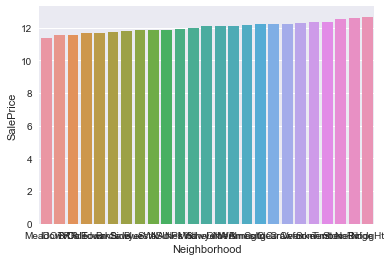

In [ ]:
median_values = df_train["SalePrice"].groupby(df_train["Neighborhood"]).median().sort_values()
sns.barplot(x = median_values.index, y= median_values)

Above, we have ordered neighbourhood by their median selling price. There appears to be five distinct affluence clusters that the neighbourhoods fall into. We are going to bin the neighhbourhoods according these clusters, in an ordinal fashion. This variable should help reduce the noise that may be present in any specific neighbourhood (due to small sample size or other reasons) and capture some of the broader socio-economic charactersitics of affluence and how it relates to the expected selling price of a house.

In [ ]:
neighborhood_map = {"MeadowV" : 1, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 2, "Edwards" : 2, "BrkSide" : 2, "Sawyer" : 2, 
                    "Blueste" : 2, "SWISU" : 2, "NAmes" : 2, "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 3,  "Gilbert" : 3, 
                    "NWAmes" : 3,  "Blmngtn" : 3,  "CollgCr" : 3, "ClearCr" : 3, "Crawfor" : 3,  "Veenker" : 4, 
                    "Somerst" : 4, "Timber" : 4, "StoneBr" : 5, "NoRidge" : 5, "NridgHt" : 5,}

df_total["NeighborhoodCluster"] = df_total["Neighborhood"].map(neighborhood_map)

## 5.6 Dynamics of time

Time-related features could help contextualise any unique demand or supply dynamics that were present at the time of the sale.

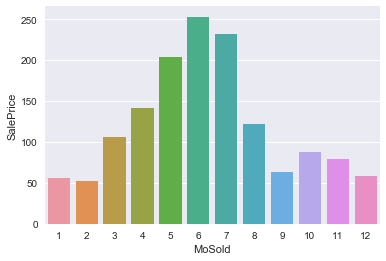

In [ ]:
monthly_sales = df_train.groupby('MoSold')['SalePrice'].count()
sns.barplot(x=monthly_sales.index, y=monthly_sales)
plt.savefig('figures/month_sold.png')

The time of year that a house is sold may have a subtle impact on price that a house could go for. We can see from the above that there are some months that in which vastly more houses are sold. It appears to coincide with the summer months. Speculation as to the reasoning for these fluctuations aside, we need to capture this pattern. Creating a binary HighSeason variable to should do the trick .

In [ ]:
df_total["HighSeason"] = df_total["MoSold"].replace( 
        {'1': 0, '2': 0, '3': 0, '4': 1, '5': 1, '6': 1, '7': 1, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0})

We suspect that a house that has been remodeled will have a small premium associated with it. We suspect that houses that have been remodeled very recently (read in the same year as they were sold) will likely carry a greater premium than other remodeled houses. We create two binary variables to capture this information. 

In [ ]:
# If YearRemodAdd != YearBuilt, then a remodeling took place at some point.
df_total["Remodeled"] = (df_total["YearRemodAdd"] != df_total["YearBuilt"]).apply(lambda x: 1 if x > 0 else 0)

# Did a remodeling happen in the year the house was sold?
df_total["RecentRemodel"] = (df_total["YearRemodAdd"] == df_total["YrSold"]).apply(lambda x: 1 if x > 0 else 0)

## 5.7 Unusual sale conditions

Assuming that all houses within the dataset have been sold for their free-market valutions would be dangerous. There is a  small proprotion of the houses in the dataset that exhibit sale peculiarities. These unique sale conditions are likely to have resulted in the house being sold for an amount that is far lower than it otherwise might have on the open market.

These percularities are currently captured in a categorical form in <font color='grey'>__SaleCondition__</font>. However, we want the model to become better aware of the presence of these situations and the depressive effect that it is likely to have on <font color='grey'>__SalePrice__</font>.

In [ ]:
# A sale in which it is highly unlikely that the seller was not looking to maximise price
df_total["Unusual_sale"] = df_total.SaleCondition.replace(
        {'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

# House completed before sale or not
df_total["BoughtOffPlan"] = df_total.SaleCondition.replace(
   {"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})

Many of our feature engineered variables are in the top 10 most correlated with <font color='grey'>__SalePrice__</font>. This suggests that it was wise to create these variables as they should provide our models with additional predictive power.

In [ ]:
df_total.corr()['SalePrice'].sort_values(ascending=False).head(10).to_frame()

,SalePrice
SalePrice,1.000
QualperSF,0.852
BathroomGrade,0.827
OverQualSq,0.825
OverallQual,0.801
HouseSFCb,0.734
NeighborhoodCluster,0.731
GarageSFQual,0.721
GrLivArea,0.704
AboveSF,0.704


## 5.8 Removing columns with very little variation

Variation in the independent variable is the life blood of most linear regression models. The basic idea is that more variation in the regressors allows you to more confidently pin down the relationship between y and X in your regression. Including variables with very little variation is going to increase the likelihood that we will overfit our model. As such, we want to drop variables that exhibit very little variation within the dataset.

In [ ]:
df_total = df_total.drop(['Utilities', 'Street', 'PoolQC', 'PoolArea'], axis=1)

In [ ]:
'''overfit = []
for i in df_total.columns:
    counts = df_total[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df_total) * 100 > 99.7:
        overfit.append(i)
overfit = list(overfit)
print(overfit)
df_total = df_total.drop(overfit, axis=1)'''

'overfit = []\nfor i in df_total.columns:\n    counts = df_total[i].value_counts()\n    zeros = counts.iloc[0]\n    if zeros / len(df_total) * 100 > 99.7:\n        overfit.append(i)\noverfit = list(overfit)\nprint(overfit)\ndf_total = df_total.drop(overfit, axis=1)'

**Important Note**: It would be possible to improve our prediciton scores on the Kaggle Leaderboard by removing variables that exhibited some variation in the training dataset but did not exhibit much variation in the test dataset. However, we will not be doing this as it will likely reduce the generalisability of our model predictions on an unseen test dataset. Whilst we want to perform well on the Kaggle leaderboard, we also want to be able to produce a model that performs well on unseen data (as this, ultimately, is the purpose of machine learning).

## 5.9 Creating dummy variables from catergorical variables

Models are not able to understand text or categorical variables. We need to create dummies to proceed.

In [ ]:
#Firstly, we need to drop the features we decided were likely to cause issues of multicollineraity for our models
df_total.drop(['GarageArea', 'GarageCond', 'TotRmsAbvGrd', 'AboveSF', '2ndFlrSF', 'GarageYrBlt', 'BsmtFinSF2'], axis = 1, inplace = True)
numerical_features = df_total.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")

In [ ]:
print("Pre - dummy number of features : " + str(df_total.shape[1]))

Pre - dummy number of features : 108


In [ ]:
df_total = pd.get_dummies(df_total)
print("New number of features : " + str(df_total.shape[1]))

New number of features : 279


In [ ]:
df_total["MSZoning_C (all)"].value_counts()/len(df_total)

0   0.991
1   0.009
Name: MSZoning_C (all), dtype: float64

# 6. Model construction

Before we begin we need to break our collective dataset back into its resepctive training and test sets. Then, with a little help sklearn, we need to create training and validation datasets partitions within our original training data set. This will allow us to perform cross-validations.

In [ ]:
df_total = df_total.drop('SalePrice', axis = 1)
train = df_total.iloc[:df_train_ends,:]
test = df_total.iloc[df_train_ends:,:]
print(train.shape)
train = train.drop("MSZoning_C (all)", axis = 1)
test = test.drop("MSZoning_C (all)", axis = 1)

(1455, 278)


In [ ]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1018, 277)
X_test : (437, 277)
y_train : (1018,)
y_test : (437,)


## 6.1 Scaling features

This is a crucial step in the modelling process. The variables in our dataset are likely to have measured in diffeerent magnitudes and may have vastly different ranges. This poses a problem for most linear models as they predominantly use Eucledian distance between data points to determine their best fit. Variables with large magintudes and ranges will then dominate the fitting of the model (despite the fact that these variables may explian less of the variation in the target variable).

In order to negate this, we need to reduce all the features to the same magnitude. Normally, we would use the MinMaxScaler, which shrinks every value between 0 and 1 (a proportion of the range). However, the MinMaxScaler is sensitive to outliers. There are still some extreme values in our dataset. As such, we will use the __RobustScaler__ which uses the inter-quartile rather than the full range.

In [ ]:
from sklearn.preprocessing import RobustScaler
rbstSc = RobustScaler()
X_train.loc[:, numerical_features] = rbstSc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = rbstSc.transform(X_test.loc[:, numerical_features])

In [ ]:
train.loc[:, numerical_features] = rbstSc.fit_transform(train.loc[:, numerical_features])
test.loc[:, numerical_features] = rbstSc.transform(test.loc[:, numerical_features])

## 6.2 Scoring model

In [ ]:
n_folds = 10
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

## 6.3 Random Forest model

We will start with the **RandomForest** regressor as it very easy to implement and provides us with valuable insight when we call on its feauture importance function. 

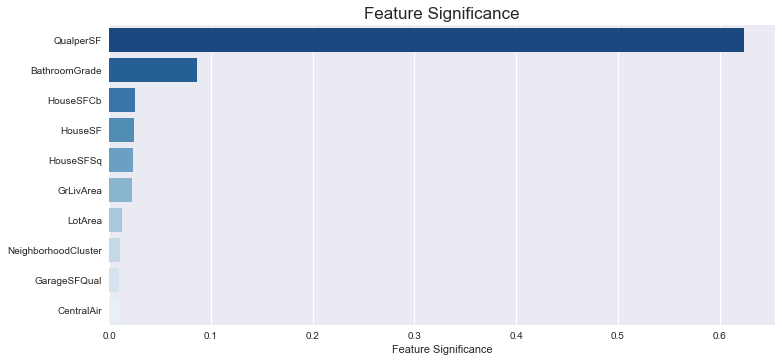

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(n_estimators=1000, random_state=42)
randomforest.fit(X_train, y_train)

# Lets have a look at which features that the random forest identifues as being significant 
coef = pd.Series(randomforest.feature_importances_, index = X_train.columns).sort_values(ascending=False)
coef = coef.head(10).to_frame()
coef.columns = ['Feature Significance']
plt.figure(figsize=(10, 5))
plt.title('Feature Significance',fontsize=17)
plt.tight_layout()
sns.barplot(x='Feature Significance', y=coef.index, data=coef, palette='Blues_r')
plt.savefig('figures/feature_significance.png')

It appears as if our the quality per square foot, the interaction variable we constructed, is overwhelmingly the most important feature in determining the selling price of a house. This suggests that our interaction terms do help to explain significant amount of the variation in '<font color='grey'>__SalePrice__</font>'. However, it is a little worrying that one variable is so outrighly dominant.

Let's have a quick look at how well our RandomForest model does at predicting the validation data's '<font color='grey'>__SalePrice__</font>' values

In [ ]:
# Predict the values of SalePrice for training and validation datasets
y_rf_train = randomforest.predict(X_train)
y_rf_test = randomforest.predict(X_test)

print("Random Forest RMSE on Training set :", rmsle(y_train, y_rf_train).mean())
print("Random Forest RMSE on Validation set :", rmsle(y_test, y_rf_test).mean())

Random Forest RMSE on Training set : 0.04975927069376072
Random Forest RMSE on Validation set : 0.13269925849646821


It appears as if our Random Forest model is guilty of serious overfitting. Lets have quick look at how well our predictions of '<font color='grey'>__SalePrice__</font>' approximated the real '<font color='grey'>__SalePrice__</font>' over range of the range of '<font color='grey'>__SalePrice__</font>'

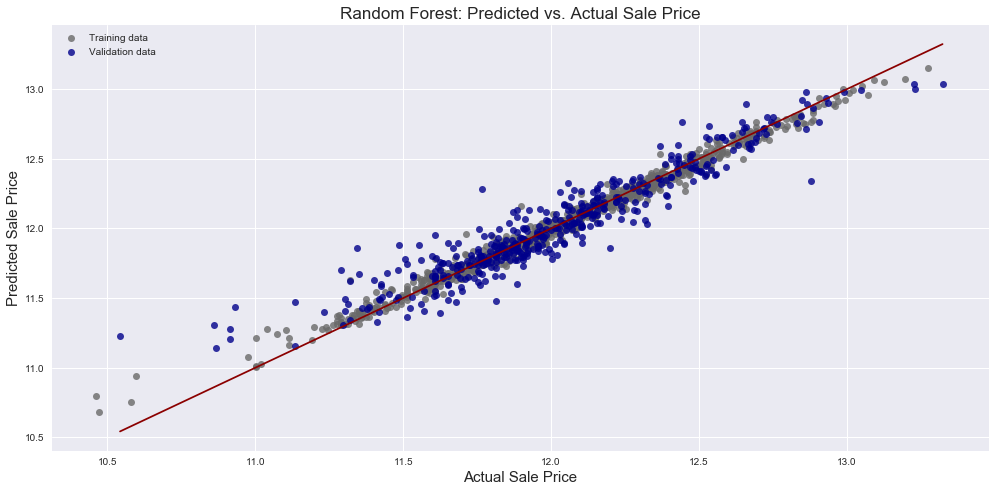

In [ ]:
plt.figure(figsize=(14, 7))

sns.regplot(x=y_train, y=y_rf_train, fit_reg=False, color = 'dimgrey', label = "Training data")
sns.regplot(x=y_test, y=y_rf_test, fit_reg=False, color = 'darkblue', label = "Validation data")

plt.title('Random Forest: Predicted vs. Actual Sale Price', fontsize=17)
plt.xlabel('Actual Sale Price', fontsize=15)
plt.ylabel('Predicted Sale Price', fontsize=15)
plt.legend(loc = "upper left")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'darkred')
plt.tight_layout()
plt.savefig('figures/random_forest_vs_price.png')

We see that our Random Forest model does fairly well at predicting the <font color='grey'>__SalePrice__</font> the price is close the mean but breaks down when the price is on either extreme of the price range (it seems to systematically overestimate the price of low-valued houses).

Let's see how our model does on the full training set

In [ ]:
#Fit the Random Forest model to full training set
randomforest = RandomForestRegressor(n_estimators=1000, random_state=42)
randomforest.fit(train, y)

# Predict the SalePrice values for the test set
y_rf = randomforest.predict(train)
print("Random Forest RMSE on Full Training set :", rmsle(y, y_rf).mean())
randforest_submission_price = randomforest.predict(test)

Random Forest RMSE on Full Training set : 0.04850328973632292


Unsurprisingly, our Random Forest model overfits the actual test data. It scores an RMSLE of 0.13666 on the Kaggle Leaderboard. This is a decent score but relative to score produced on the training set, it is very high. This suggests that we should try to use models that penalise overfitted parameters.

## 6.3 OLS Linear Regression model

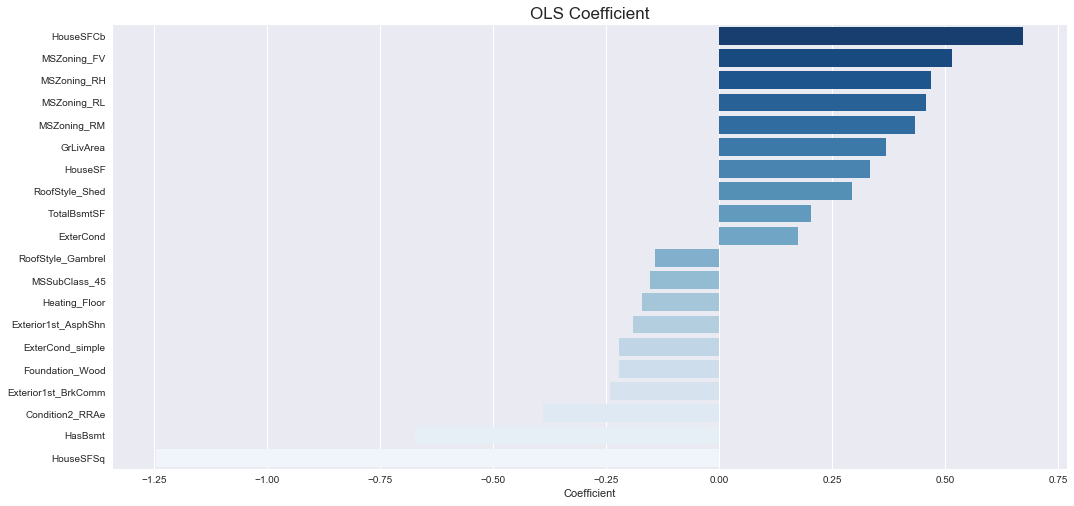

In [ ]:
# Fit the OLS regression to the X_train set
reg = LinearRegression()
reg.fit(X_train.values, y_train.values)

coef = pd.Series(reg.coef_, index = X_train.columns).sort_values(ascending=False)
big_coef = coef.head(10).to_frame()
small_coef = coef.tail(10).to_frame()
coef = pd.concat([big_coef, small_coef])
coef.columns = ['Coefficient']

plt.figure(figsize=(14, 7))
plt.title('OLS Coefficient', fontsize=17)

plt.tight_layout()
sns.barplot(x='Coefficient', y=coef.index, data=coef, palette='Blues_r')
plt.savefig('figures/OLS.png')

The size of some of the coeffecients are surprising given what the Random Forest regressor had suggested were the important features. This leads us to believe that an simple OLS regression may not be the best model and that the use of regularisation is required. Nevertheless, we will look at how well our model did at predicting validation data

In [ ]:
# Predict SalePrice for both training and validation data 
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print("RMSE on Training set :", rmsle(y_train.values, y_train_pred).mean())
print("RMSE on Validation set :", rmsle(y_test.values, y_test_pred).mean())

RMSE on Training set : 0.08533154373953865
RMSE on Validation set : 0.12145381055792114


Our OLS regression appears to exhibit less overfitting than was the case with our Random Forest model. However, it is clear that there is still significant overfitting occuring when we use a simple OLS model. Lets have quick look at how well our predictions of '<font color='grey'>__SalePrice__</font>' approximated the real '<font color='grey'>__SalePrice__</font>' over range of the range of '<font color='grey'>__SalePrice__</font>' 

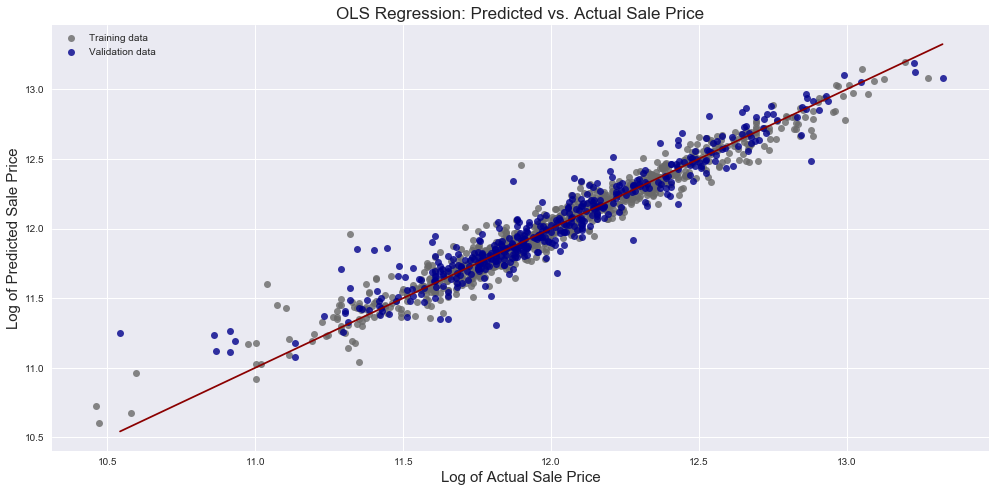

In [ ]:
plt.figure(figsize=(14, 7))

# Overlay the scatter plots
sns.regplot(x=y_train, y=y_train_pred, fit_reg=False, color = 'dimgrey', label = "Training data")
sns.regplot(x=y_test, y=y_test_pred, fit_reg=False, color = 'darkblue', label = "Validation data")

# Create the titles
plt.title('OLS Regression: Predicted vs. Actual Sale Price', fontsize=17)
plt.xlabel('Log of Actual Sale Price', fontsize=15)
plt.ylabel('Log of Predicted Sale Price', fontsize=15)
plt.legend(loc = "upper left")

# Create the line of prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'darkred')
plt.tight_layout()
plt.savefig('figures/OLS_vs_price.png')

Once again our model performs well for houses with prices close to the mean price but breaks wen asked to predict for houses at extremesof the price distribution.

In [ ]:
# Fit the OLS onto train data
reg = LinearRegression()
reg.fit(train, y)

# Predict SalePrice of training and test dataset
y_train_OLS = reg.predict(train)
OLS_predictions = reg.predict(test)
print("RMSE on Full Training set :", rmsle(y, y_train_OLS).mean())

RMSE on Full Training set : 0.09082303243722255


Our OLS model earns an RMSLE score of 0.13485 on the Kaggle leaderboard. This is a slight improvement over the score achieved by our Random Forest model but exhibits a high degree of overfitting. It is expected that the use of regularisation models will improve on this.

## 6.4 Regularised Linear Regression models

Regularised models are OLS regressions that constrains the size of the coefficient estimates (toward zero). The addition of these constraints helps improve the fit of the model as shrinking the size of the coefficient estimates reduces their variance. A lower variance in the estimation parameters helps to the model to avoid being overfit when being trained. The net effect of regularisation is that the model should produce more generalised predictions.

### 6.4.1 Ridge Regression

Ridge regression uses the value $ alpha $ for to determine how heavily it should penalise large coefficients. The performance of the model is intricantly linked to the size of the $ alpha $. If the $ alpha $ is too small then our model will effectively just be an OLS regression. However, if the alpha is too big then we will re- introduce bias into the model. We will let the model choose an appropriate $ alpha $ for us to optimise the perfromance of our Ridge regression.

In [ ]:
# Create a range of alphas that the model can use to penalise the model
# The model will run every one of the options and then take one that gives the lowest score
alphas = np.linspace(1,50,50)

# Fit the model on training using the alphas created
ridge = RidgeCV(alphas = alphas, cv=10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

# Fit a second model looking for greater precision in our alpha value
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

# Determine if any values were able to be set to 0
print("Ridge picked " + str(sum(ridge.coef_ != 0)) + " features and eliminated the other " +  \
      str(sum(ridge.coef_ == 0)) + " features")

Best alpha : 21.0
Try again for more precision with alphas centered around 21.0
Best alpha : 21.0
Ridge picked 267 features and eliminated the other 10 features


The Ridge model has determined that the value of $ alpha $ that optimises the model is 21. The larger the $ alpha $, the the less flexible the fit of the model. This suggests that the Ridge model has greatly reduced the flexibility of fit relative to our OLS. This should help reduce our issue our overfitting.

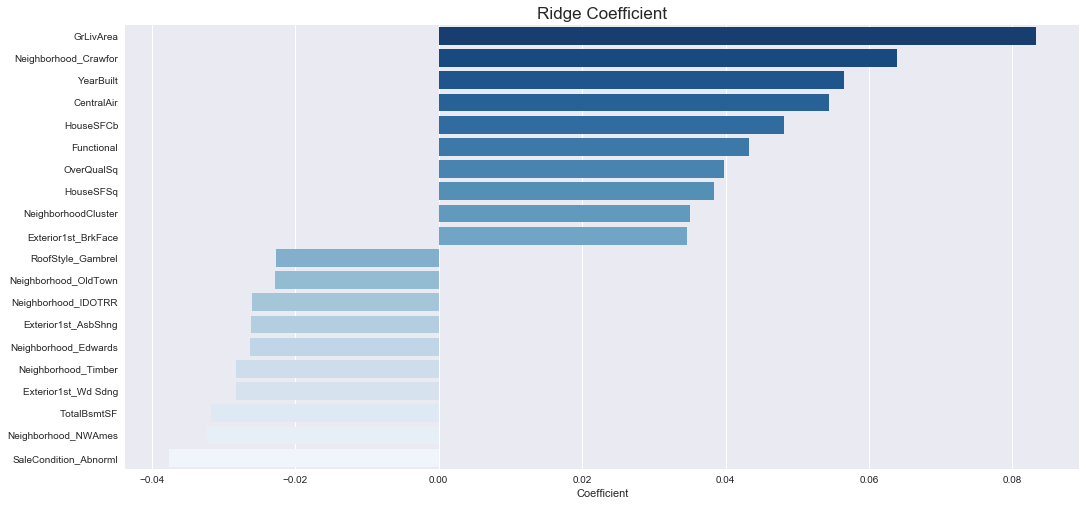

In [ ]:
# Locate the largest positive and negative coefficients
coef = pd.Series(ridge.coef_, index = X_train.columns).sort_values(ascending=False)
big_coef = coef.head(10).to_frame()
small_coef = coef.tail(10).to_frame()
coef = pd.concat([big_coef, small_coef])
coef.columns = ['Coefficient']

plt.figure(figsize=(14, 7))
plt.title('Ridge Coefficient', fontsize=17)

plt.tight_layout()
sns.barplot(x='Coefficient', y=coef.index, data=coef, palette='Blues_r')
plt.savefig('figures/ridge_vs_price.png')

It is noticeable how much smaller the size of the Ridge coeffecients of our Ridge regression relative to the ones we saw in the OLS model. The Ridge model was able perform some feature selection for us, dropping 10 variables from the model. This reduces the influence of noisy variables and allows the model to model the variable that have a strong effect on the determination of <font color='grey'>__SalePrice__</font>.

In [ ]:
# Predicting the SalePrice for our training and test sets
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

print("RMSE on Training set :", rmsle(y_train.values, y_train_rdg).mean())
print("RMSE on Validation set :", rmsle(y_test.values, y_test_rdg).mean())

RMSE on Training set : 0.09859137380368553
RMSE on Validation set : 0.11319861253896753


Our Ridge model has successfully reduced the degree to which our model overfitted on the training data. This is a big improvement in score relative to the mdoels we ran previously. 

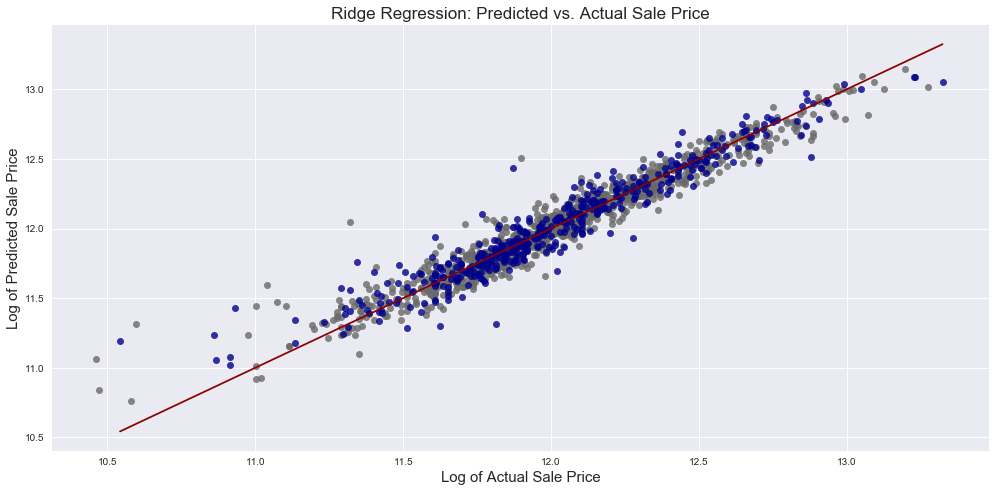

In [ ]:
plt.figure(figsize=(14, 7))
sns.regplot(x=y_train, y=y_train_rdg, fit_reg=False, color = 'dimgrey', label = "Training data")
sns.regplot(x=y_test, y=y_test_rdg, fit_reg=False, color = 'darkblue', label = "Test data")
 
plt.title('Ridge Regression: Predicted vs. Actual Sale Price', fontsize=17)
plt.xlabel('Log of Actual Sale Price', fontsize=15)
plt.ylabel('Log of Predicted Sale Price', fontsize=15)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'darkred')
plt.tight_layout()
plt.savefig('figures/ridge_vs_price.png')

In [ ]:
# Training the Ridge model on the full training dataset
alphas = np.linspace(1,50,50)
ridge = RidgeCV(alphas = alphas)
ridge.fit(train, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(train, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge picked " + str(sum(ridge.coef_ != 0)) + " features and eliminated the other " +  \
      str(sum(ridge.coef_ == 0)) + " features")

y_ridge = ridge.predict(train)
print("Ridge RMSE on Full Training set :", rmsle(y, y_ridge).mean())
ridge_submission_price = ridge.predict(test)

Best alpha : 21.0
Try again for more precision with alphas centered around 21.0
Best alpha : 16.8
Ridge picked 274 features and eliminated the other 3 features
Ridge RMSE on Full Training set : 0.09935114586790918


Once again, the Ridge manages to perform some variable selection for us. Our Ridge model's predictions managed to get a score of 0.1175 on Kaggle's Leaderboard. This is an incredible improvement over the prediction scores produced by the OLS or Random Forest models.  

### 6.4.2 LASSO Regression

The Lasso model is another type of regularisation model. Unlike the Ridge regression's $ alpha $, the Lasso's penalty parameter forces a subset of the the coefficient estimates to be exactly equal to zero when alpha is large enough.  This effectively means that the Lasso model will perform feature selection for us; undoubtedly a desirable quality for a model to posses. As with the Ridge model,optimising the size of the $ alpha $ is important to reduce overfitting without introducing a significant amount of additional bias to the model. 

Like the Ridge model, we will allow our model to perform its own _cross-validation_ to determine the optimal size of the $ alpha $ on its own.

In [ ]:
#Create the list of possible values that alpha can take on (alpha in this case denotes the L1 penalty)
alphas = np.linspace(0.00001,1,1000)

#Fit the model to our training dataset using the 
lasso = LassoCV(alphas = alphas, max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("LASSO picked " + str(sum(lasso.coef_ != 0)) + " features and eliminated the other " +  \
      str(sum(lasso.coef_ == 0)) + " features")

Best alpha : 0.0010109909909909911
Try again for more precision with alphas centered around 0.0010109909909909911
Best alpha : 0.0009098918918918921
LASSO picked 82 features and eliminated the other 195 features


Our Lasso model has done extensive feature selection for us. It managed to kick out almost two third of features included in the dataset by setting tem equal to zero.

No handles with labels found to put in legend.


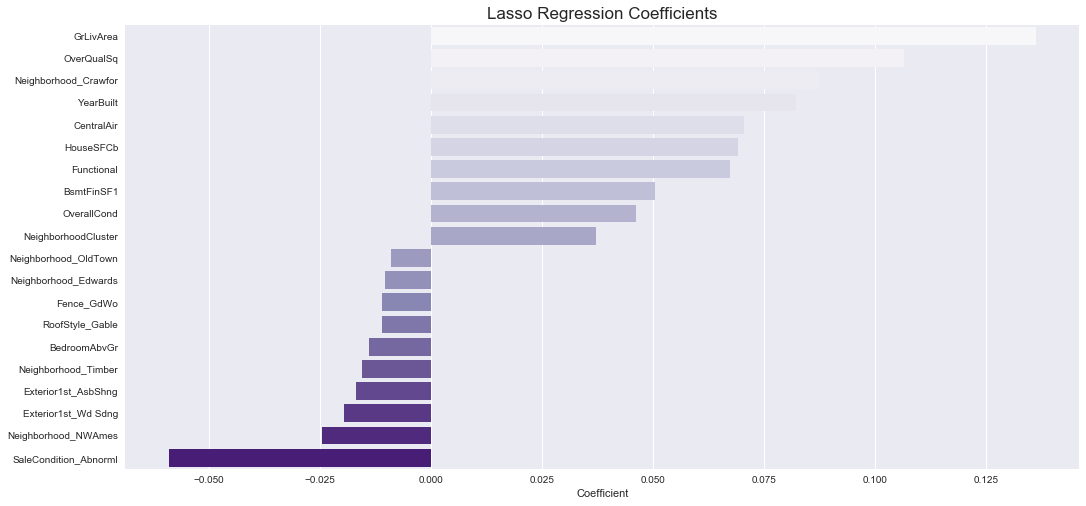

In [ ]:
coef = pd.Series(lasso.coef_, index = X_train.columns).sort_values(ascending=False)
big_coef = coef.head(10).to_frame()
small_coef = coef.tail(10).to_frame()
coef = pd.concat([big_coef, small_coef])
coef.columns = ['Coefficient']

plt.figure(figsize=(14, 7))
plt.title('Lasso Regression Coefficients', fontsize=17)
plt.legend(loc = "upper left")

plt.tight_layout()
sns.barplot(x='Coefficient', y=coef.index, data=coef, palette='Purples')
plt.savefig('figures/lasso.png')

It appears that the Lasso model concurs with the Ridge model about which variables are the key determinants of <font color='grey'>__SalePrice__</font> (the ordering of differs slightly across the models). However, there is noticable departure in terms of the size of the coefficients, with the Lasso's coefficients being far larger than the Ridge's.

In [ ]:
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

print("Lasso RMSE on Training set :", rmse_CV_train(lasso).mean())
print("Lasso RMSE on Validation set :", rmse_CV_test(lasso).mean())

Lasso RMSE on Training set : 0.11427967380046111
Lasso RMSE on Validation set : 0.12103477652544785


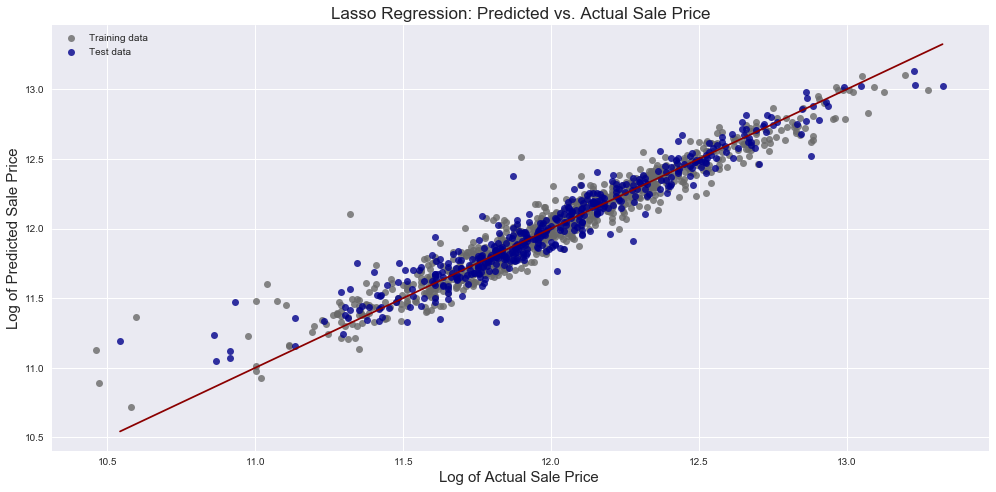

In [ ]:
plt.figure(figsize=(14, 7))
sns.regplot(x=y_train, y=y_train_las, fit_reg=False, color = 'dimgrey', label = "Training data")
sns.regplot(x=y_test, y=y_test_las, fit_reg=False, color = 'darkblue', label = "Test data")
 
plt.title('Lasso Regression: Predicted vs. Actual Sale Price', fontsize=17)
plt.xlabel('Log of Actual Sale Price ', fontsize=15)
plt.ylabel('Log of Predicted Sale Price', fontsize=15)
plt.legend(loc = "upper left")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'darkred')
plt.tight_layout()
plt.savefig('figures/lasso_vs_price.png')

In [ ]:
#Create the list of possible alphas
alphas = np.linspace(0.00001,1,1000)

#Fit the model to the full training dataset and alphas
lasso = LassoCV(alphas = alphas, max_iter = 50000, cv = 10)
lasso.fit(train, y)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(train, y)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("LASSO picked " + str(sum(lasso.coef_ != 0)) + " features and eliminated the other " +  \
      str(sum(lasso.coef_ == 0)) + " features")

y_lasso = lasso.predict(train)
print("Lasso RMSE on Training set :", rmsle(y, y_lasso).mean())
lasso_submission_price = lasso.predict(test)

Best alpha : 0.0010109909909909911
Try again for more precision with alphas centered around 0.0010109909909909911
Best alpha : 0.0006065945945945946
LASSO picked 87 features and eliminated the other 190 features
Lasso RMSE on Training set : 0.10341450946937666


As expected, our Lasso model effectively dropped the majority of features from the model. The Lasso model manages to reduce the degree to which our linear model is overfitted. However, our Lasso model appears to perform slighly worse in terms of the accuracy of its predictions on unsees data than our Ridge mdoel. In this instance, our Lasso model achieves an RMSLE score of 0.11926 on Kaggle's Leaderboard.

## 6.5 Stacking models

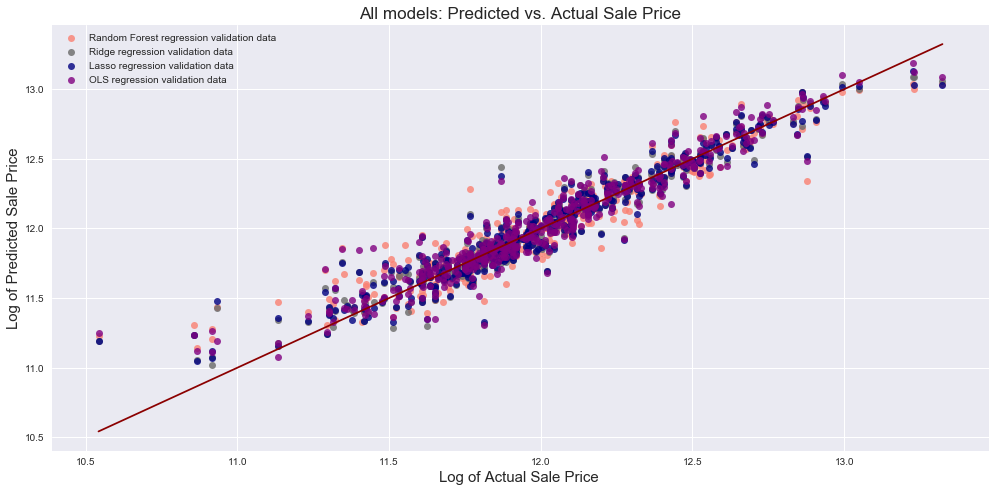

In [ ]:
plt.figure(figsize=(14, 7))
sns.regplot(x=y_test, y=y_rf_test, fit_reg=False, color = 'salmon', label = 'Random Forest regression validation data')
sns.regplot(x=y_test, y=y_test_rdg, fit_reg=False, color = 'dimgray', label = 'Ridge regression validation data')
sns.regplot(x=y_test, y=y_test_las, fit_reg=False, color = 'navy', label = 'Lasso regression validation data')
sns.regplot(x=y_test, y=y_test_pred, fit_reg=False, color = 'purple', label = 'OLS regression validation data')

    
plt.title('All models: Predicted vs. Actual Sale Price', fontsize=17)
plt.xlabel('Log of Actual Sale Price ', fontsize=15)
plt.ylabel('Log of Predicted Sale Price', fontsize=15)

plt.legend(loc = "upper left")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'darkred')
plt.tight_layout()
plt.savefig('figures/all_models_vs_price.png')

We can see from the graph above that no model systematically makes a better prediction for every observation in our validation set. This suggests that using a combination of models to determine our final predictions might perform better than any individual model on its own. 

Normally, we would look to create a blended model that is the weighted average of the predictions of all of our models. However, a stacked model in our case doesn't improve our _RMSE_ score on the Kaggle Leaderboard. It is likely that this because our the techniques used by our models to estimate the paramaters are too similar and their averaging doesnt reduce the variance to the degree that one would expect when using models that use fundamentally different techniques.

# 7. Submission

Our Ridge model produces the best score overall and we will use this model to make our final submission to the Kaggle competition.

In [ ]:
ridge_submission_price = np.expm1(ridge_submission_price)

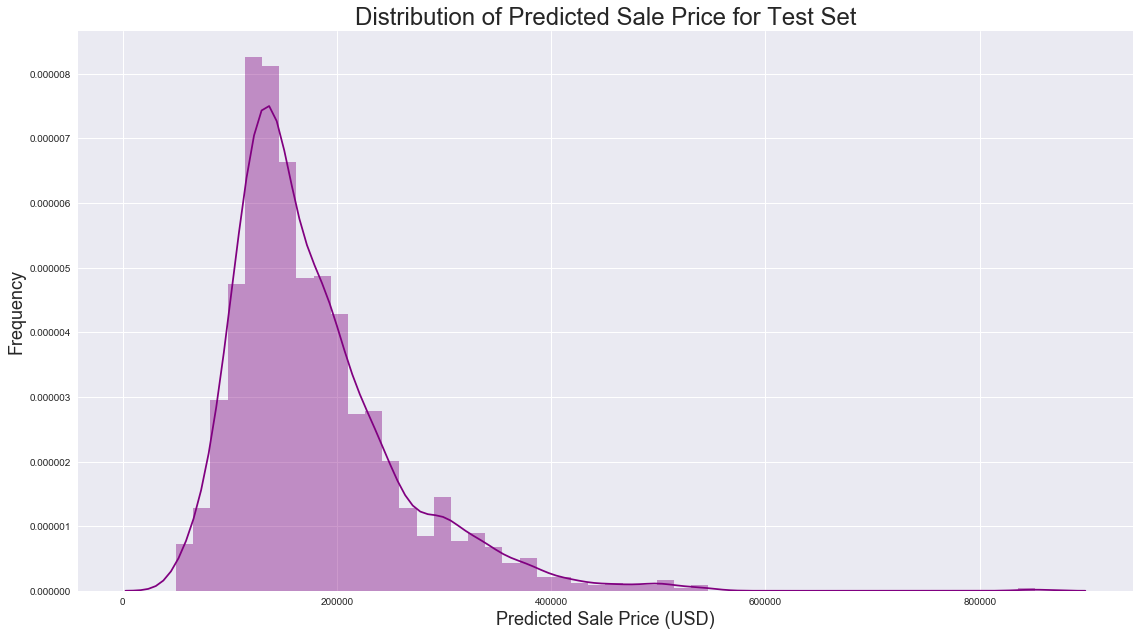

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Distribution of Predicted Sale Price for Test Set', fontsize=24)
sns.distplot(ridge_submission_price, color='purple')
plt.xlabel('Predicted Sale Price (USD)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tight_layout()

Our <font color='grey'>__SalePrice__</font> predictions exhibit a similarly positively-skewed distirbution to that of the <font color='grey'>__SalePrice__</font> in the original train dataset. 

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = elastnet_predictions
sub.to_csv('submission',index=False)

NameError: name 'elastnet_predictions' is not defined

# 8. Conclusion